In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10, 10)

%load_ext autoreload
%autoreload 2

from core.quadratic_analyzer import *

## Анализ работы градиентного спуска на квадратичных функциях двух переменных

Рассмотрим такие квадратичные фукнции: ax^2^ + bxy + cy^2^ + dx + ey.
Можно добавить константу, но она никак не влияет решение текущей задачи, так как это просто добавляет вертикальное смещение, которое никак не влияет на
производную, в том числе на численные методы ее вычисления.

Такие функции можно разделить на типы по сечению графика фунцкии по оси значений:
1. Положительно опрделенная форма. В сечении получаются элипсы.
2. Отрицательно опрделенная форма. В сечении получаются гипреболы.
3. a = 0, c = 0. В сечении получаются две прямые.
4. a = 0 или c = 0, то но не оба. В сечении получаются параболы.


## Случай положительно определенной формы.

Это наиболее содержательный случай, так как у функции есть глобальный минимум.

### Метод постоянного шага.
Сходимость методов с постоянным шагом будет сильно зависеть от выбора шага. Если шаг был выбран слишком большой,
то метод разойдется, так как будет ходить вдоль отрезка. На больших значениях будет большая производная, а значит размер реального шага
будет увеличиваться, поэтому траектория точек будет ходить вдоль прямой с потенциальным минимумом, но на каждой следующей итерации будет только
отдаляться от него. При достаточно маленьком шаге метод будет сходиться, но для этого потребуется достаточно много итераций. Оссобенно заметно, что
в точках близких к минимуму сдвиг точки будет невелик, так как длина градиента начинает постепенно уменьшаться. Это создает более плавную траекторию,
что может хорошо работать для более сложных функций с большим количеством станционарных точек, так как траектория не будет "кидаться" по сторонам, но
это приводит к малой эффективности.

### Методы линейного поиска минимума.
По графикам видно, что все методы линейного поиска минимума работают примерно одинаково. (TODO: посчитать точное количество вычислений градиента и функции)
Это следует из общего свойства нахождения минимума вдоль градиента, а не идти в "случайную" точку. Также по графикам видно, что для положительно определенных форм
траектория образуется из движения вдоль касательных элипсов, которые образованы сечениями функции по оси значений. Это создает "ломанную" траекторию, которая хорошо
себя показывает на положительно определенных формах, так как у них есть ровно 1 станционарная точка, а все остальные точки имеют градиент глобально направленных
в одно и тоже место. Для сходимости достаточно проведения всего нескольких итераций. Однако весь класс методов требует, чтобы сужение функции вдоль прямой имело производную,
которая ровно 1 раз меняет свой знак. При невыполнении этого условия метод, может найти какую-то станционарную точку. Также графики показывают, что минимум вдоль прямой не
обязательно находить точно: при запуске бинарного поиска с ограниченным числом итераций получается сопоставимый результат по числу итераций градиентного спуска.


Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [ 2.60000000e+00  2.00000000e+00]
 [ 1.28000000e+00  6.80000000e-01]
 [ 4.88000000e-01  1.52000000e-01]
 [-4.00000000e-02 -6.40000000e-03]
 [-4.30720000e-01  4.16000000e-03]
 [-7.45408000e-01  8.86400000e-02]
 [-1.01405440e+00  2.02265600e-01]
 [-1.25169664e+00  3.24170240e-01]
 [-1.46619136e+00  4.44841472e-01]
 [-1.66192138e+00  5.60143155e-01]
 [-1.84156574e+00  6.68470170e-01]
 [-2.00694662e+00  7.69395249e-01]
 [-2.15943635e+00  8.63026474e-01]
 [-2.30015437e+00  9.49703154e-01]
 [-2.43006413e+00  1.02985277e+00]
 [-2.55002186e+00  1.10392449e+00]
 [-2.66080238e+00  1.17235906e+00]
 [-2.76311372e+00  1.23557591e+00]
 [-2.85760616e+00  1.29396829e+00]
 [-2.94487859e+00  1.34790221e+00]]
Best value found: x* = [-2.94487859  1.34790221] with f(x*) = -7.412340428663294
Optimizing with fixed step = 0.7
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [-1.18000000e+01 -1.60

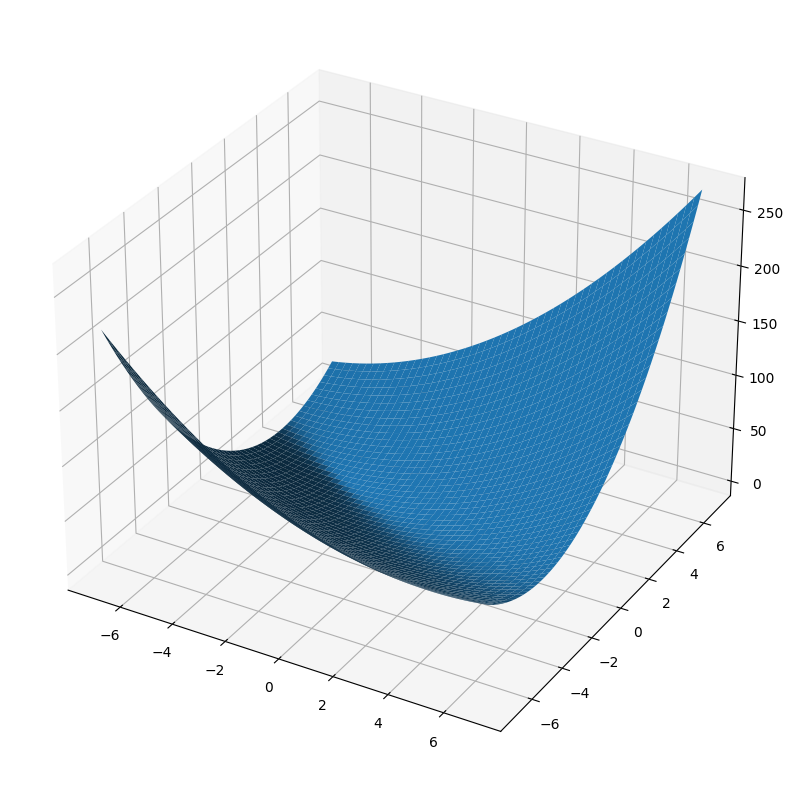

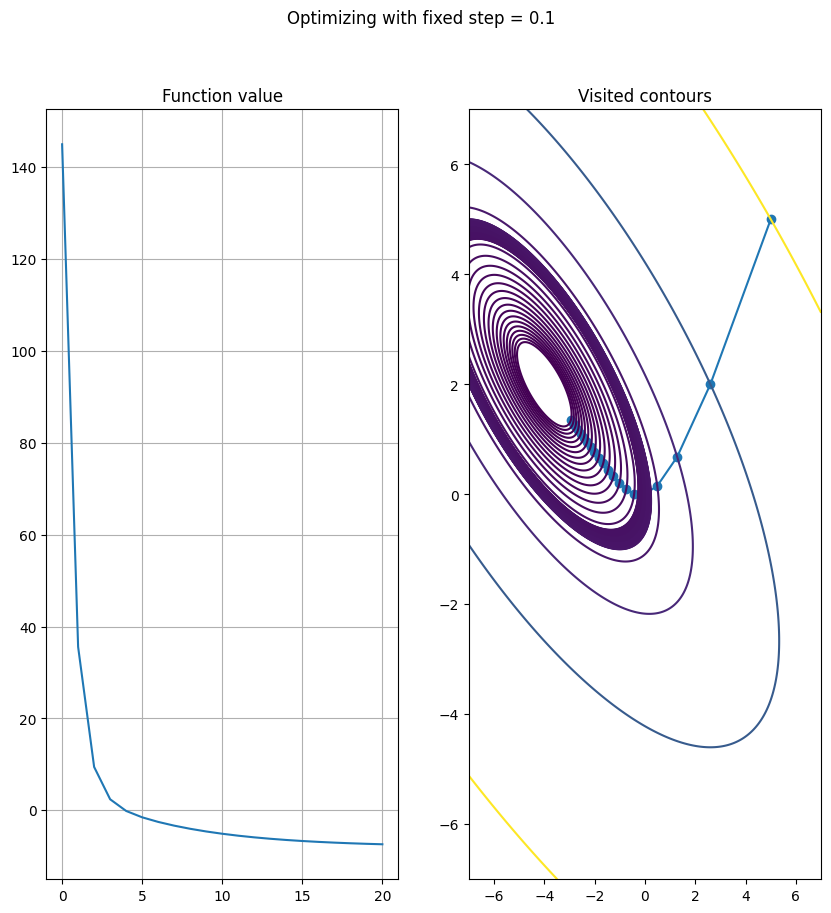

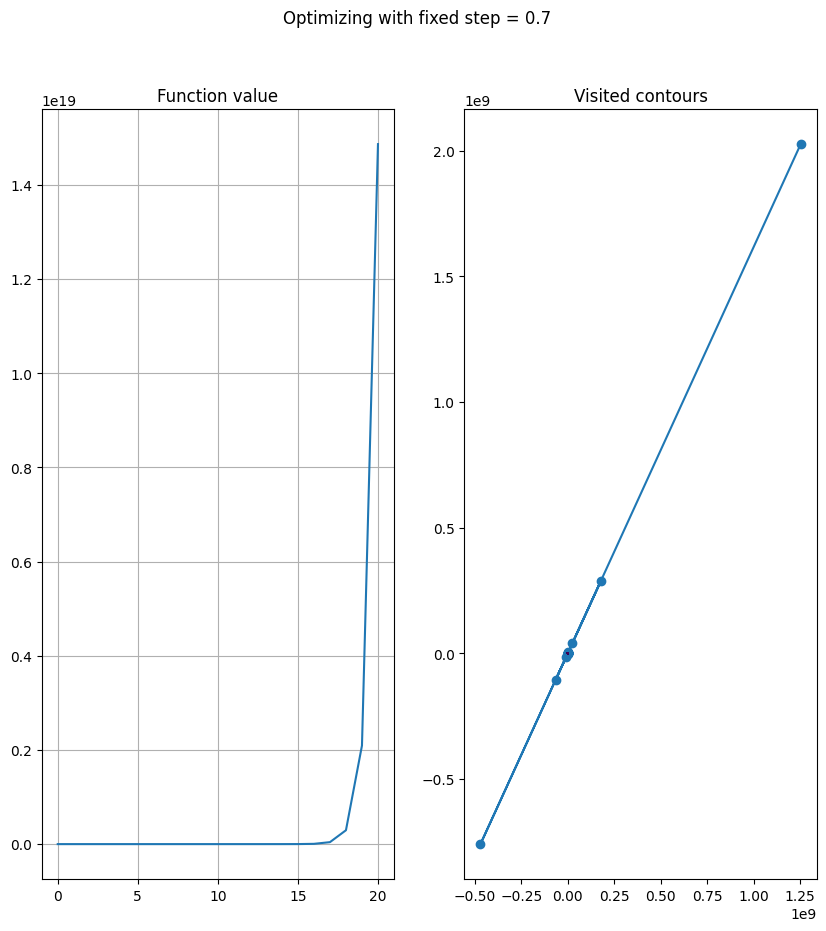

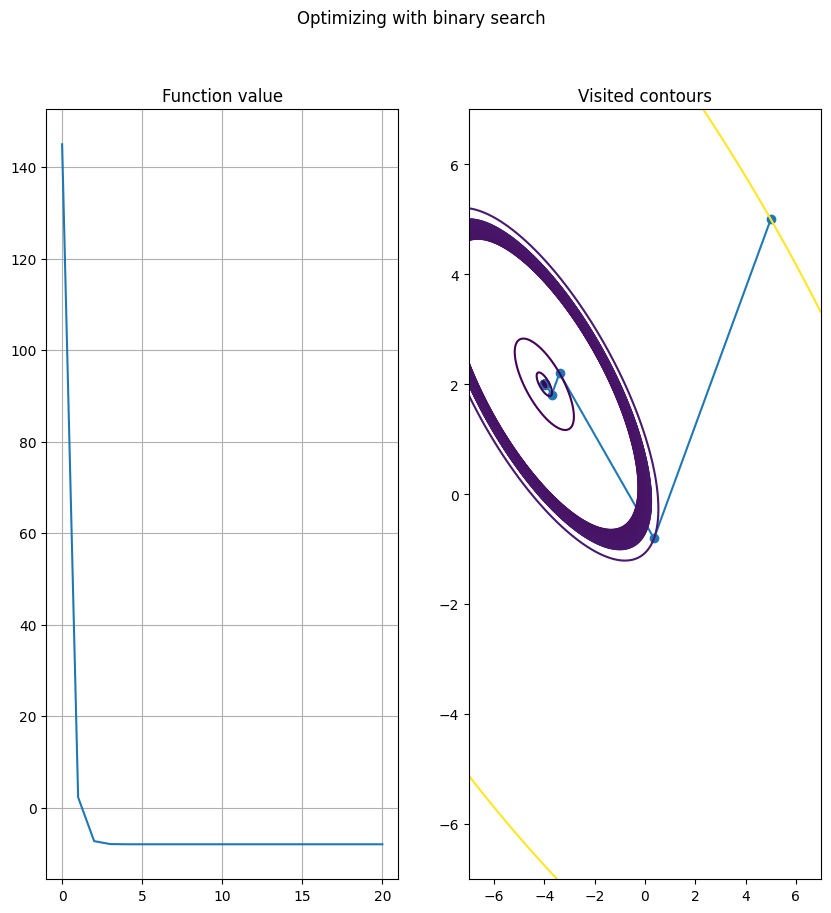

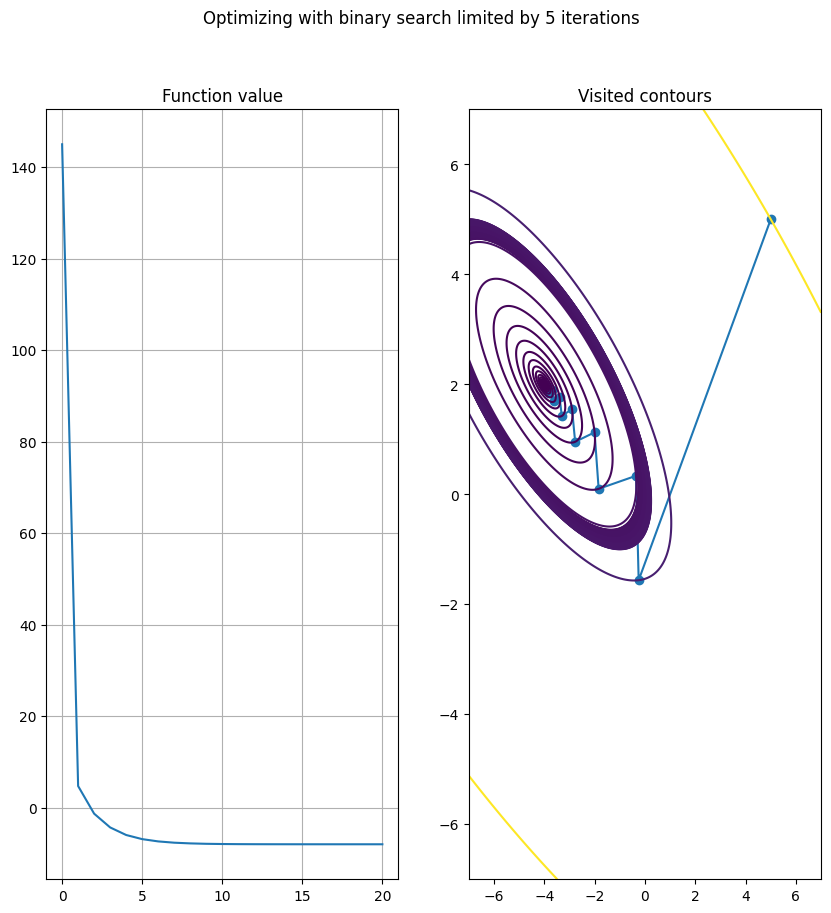

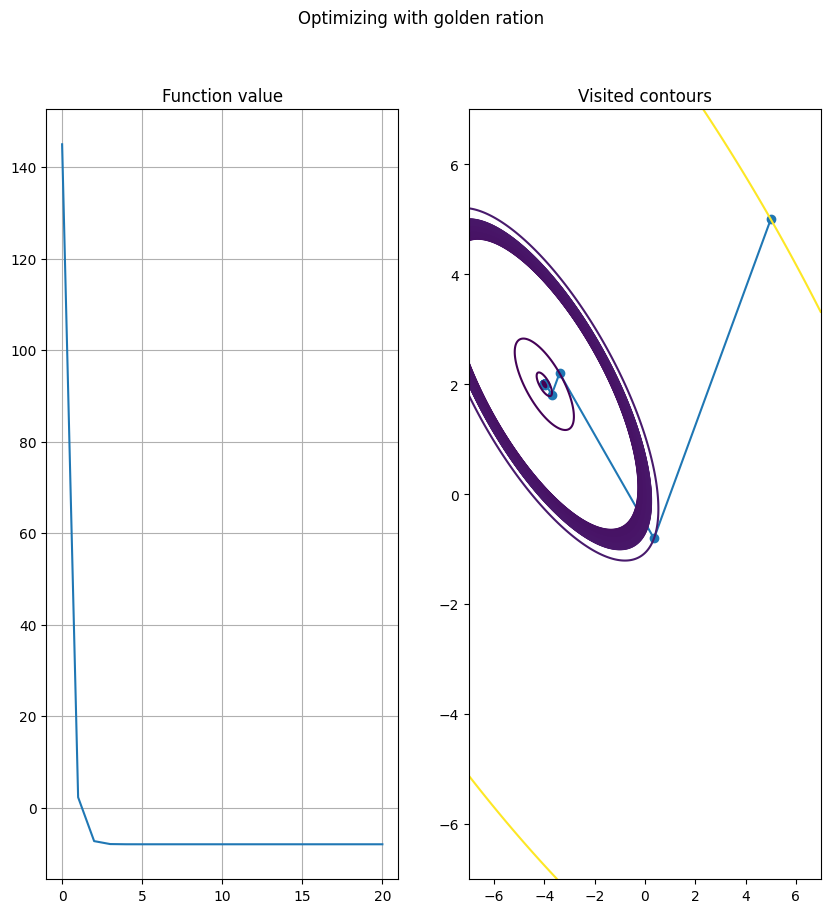

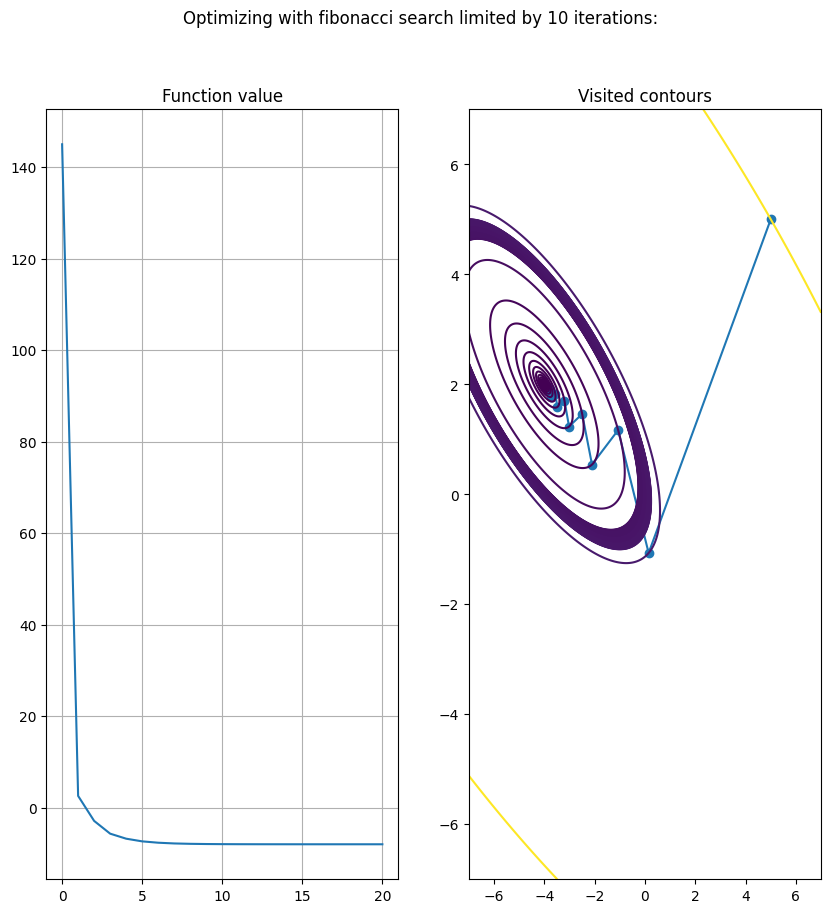

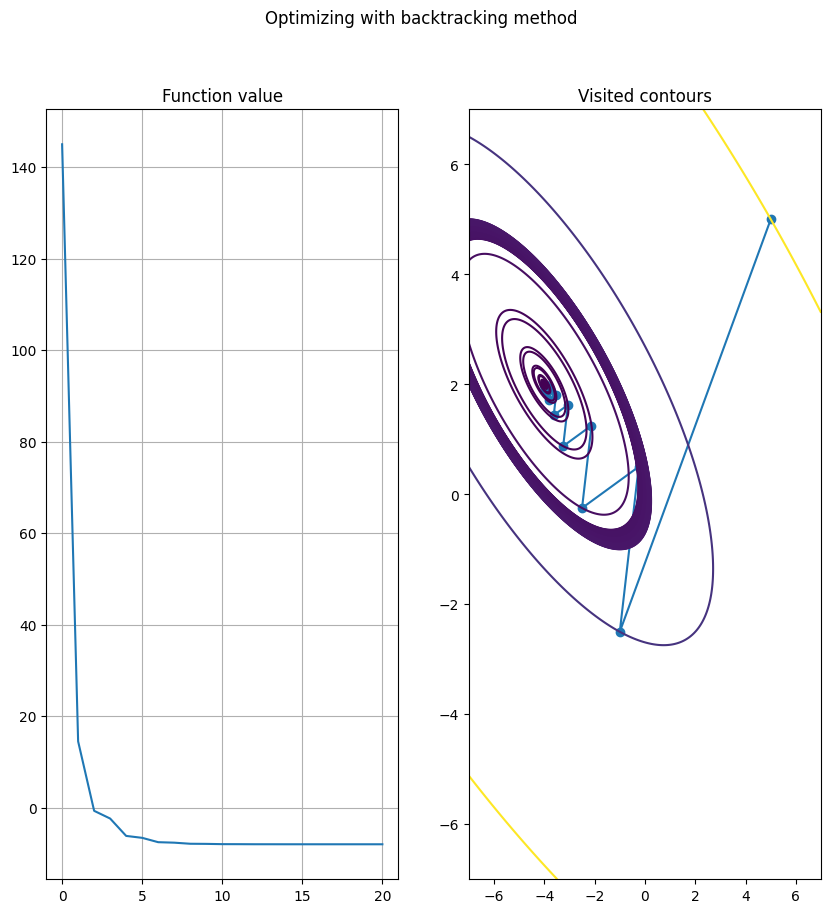

In [11]:
analyze_quadratic(roi=SearchRegion2d((-7, 7), (-7, 7)), fixed_steps=[0.1, 0.7], x0=np.array([5, 5]), bin_iters=5, fib_iters=10, a=1, b=2, c=2, d=4, e=0)

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[  5.           5.        ]
 [  4.4          6.4       ]
 [  4.06         8.02      ]
 [  3.95         9.93      ]
 [  4.053       12.211     ]
 [  4.3635      14.9585    ]
 [  4.88665     18.28655   ]
 [  5.637975    22.332525  ]
 [  6.6436325   27.2628275 ]
 [  7.94118875  33.27975625]
 [  9.58092663  40.62982638]
 [ 11.62772394  49.61388431]
 [ 14.16356758  60.59943357]
 [ 17.29079742  74.03567704]
 [ 21.13620564  90.47189219]
 [ 25.85615373 110.57989119]
 [ 31.64291211 135.18148481]
 [ 38.73247816 165.28207298]
 [ 47.41418983 202.11173539]
 [ 58.0425254  247.17550145]
 [ 71.05157047 302.31485428]]
Best value found: x* = [ 71.05157047 302.31485428] with f(x*) = -107452.5241993375
Optimizing with fixed step = 0.5
Optimizer trajectory:
[[5.00000000e+00 5.00000000e+00]
 [2.00000000e+00 1.20000000e+01]
 [5.50000000e+00 2.45000000e+01]
 [1.17500000e+01 5.12500000e+01]
 [2.51250000e+01 1.07875000e+02]
 [5.34375000e+01 

C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow encountered in scalar add
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:10: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: np.array([2 * a * x[0] + b * x[1] + d, 2 * c * x[1] + b * x[0] + e])
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:10: RuntimeWarning: overflow encountered in scalar add
  return lambda x: np.array([2 * a * x[0] + b * x[1] + d, 2 * c * x[1] + b * x[0] + e])


OverflowError: (34, 'Result too large')

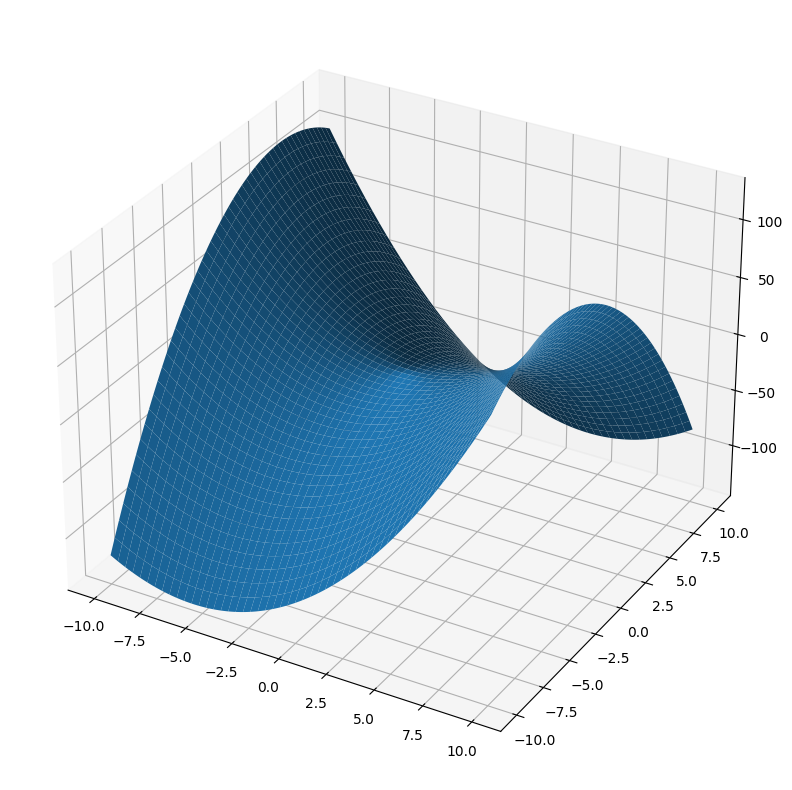

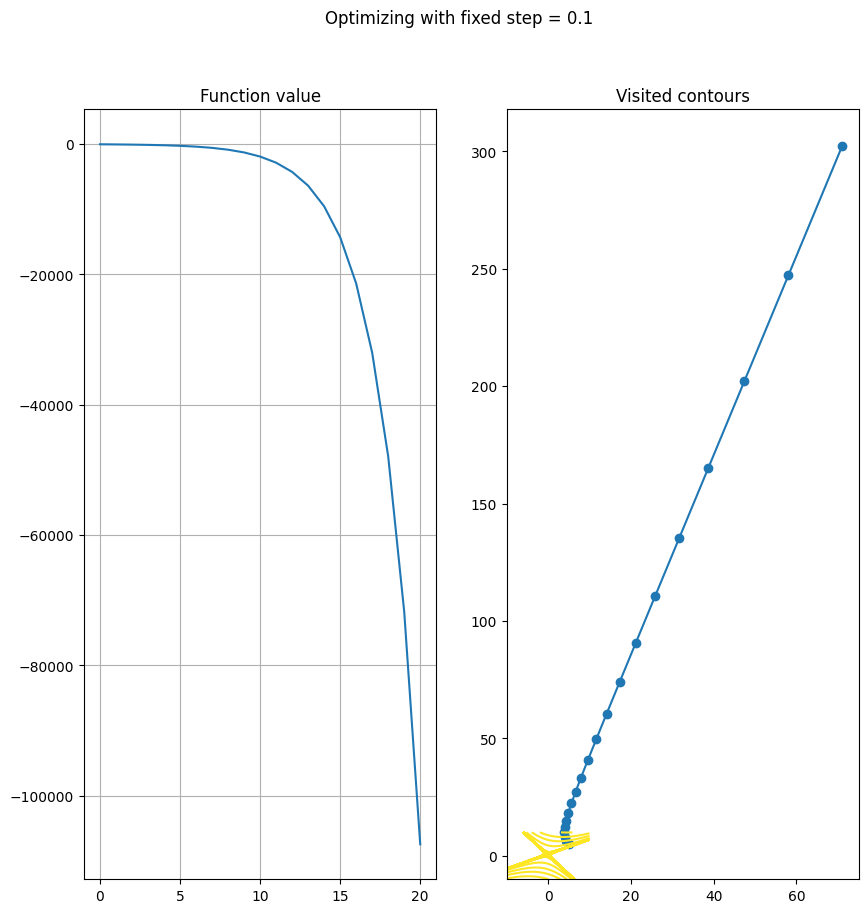

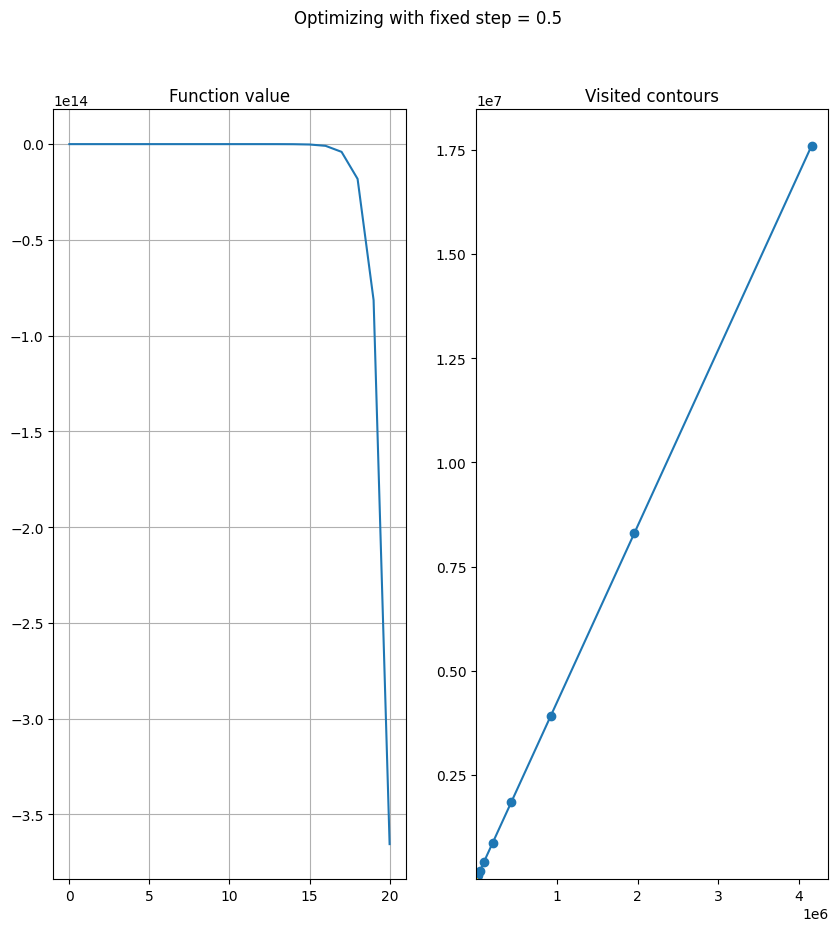

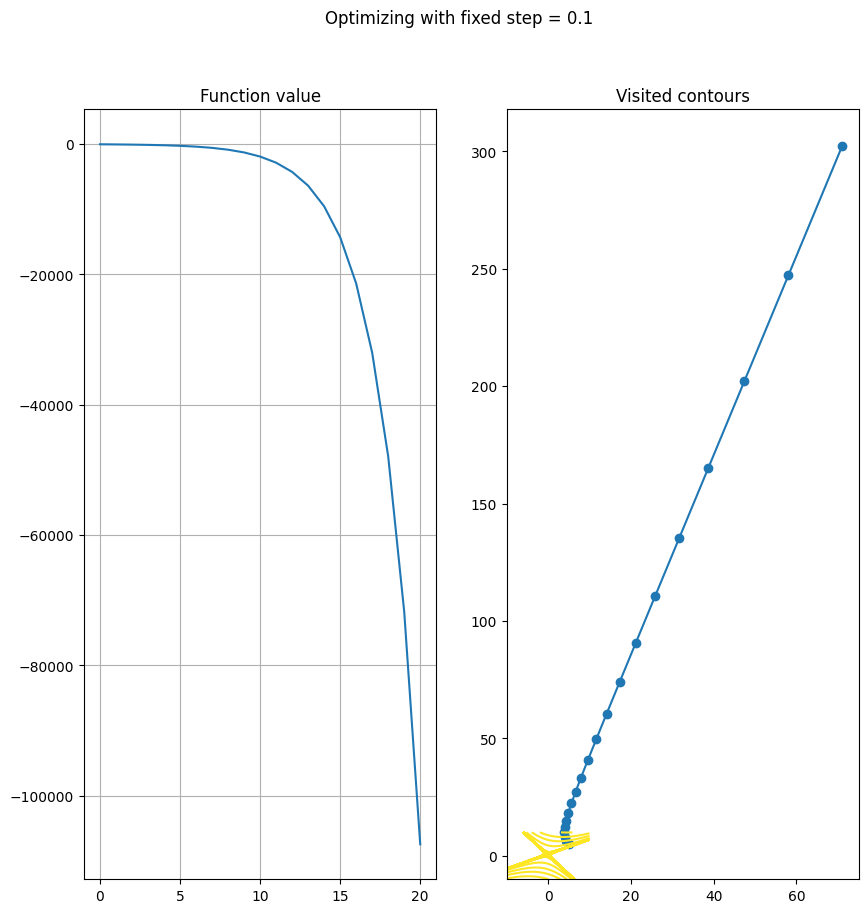

In [12]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.5, 0.1], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=1, b=-1, c=-1, d=1, e=1)

## Случай неопределенной формы.

У таких функций есть ровно 1 стационарная точка, но сама функция не ограничена, поэтому нет глобального минимума, а единственная стационарная точка
даже не является локальным минимумом.

На таком примере видно, что градиентный спуск сходится к стационарной точке, которая находится "ниже" остальных, но эта точка необязательно будет локальным минимумом.
Помимо этого, видно, что на таких функциях очень важно стартовое условие. Если стартовать со "склона", то метод за доступные шаги будет "скатываться" по склону, пока не
будет достигнуто терминально условия (в данном случае количество итераций просто ограничено).

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[ 5.          5.        ]
 [ 3.9         3.9       ]
 [ 3.02        3.02      ]
 [ 2.316       2.316     ]
 [ 1.7528      1.7528    ]
 [ 1.30224     1.30224   ]
 [ 0.941792    0.941792  ]
 [ 0.6534336   0.6534336 ]
 [ 0.42274688  0.42274688]
 [ 0.2381975   0.2381975 ]
 [ 0.090558    0.090558  ]
 [-0.0275536  -0.0275536 ]
 [-0.12204288 -0.12204288]
 [-0.1976343  -0.1976343 ]
 [-0.25810744 -0.25810744]
 [-0.30648595 -0.30648595]
 [-0.34518876 -0.34518876]
 [-0.37615101 -0.37615101]
 [-0.40092081 -0.40092081]
 [-0.42073665 -0.42073665]
 [-0.43658932 -0.43658932]]
Best value found: x* = [-0.43658932 -0.43658932] with f(x*) = -0.49195817062550123
Optimizing with fixed step = 0.5
Optimizer trajectory:
[[ 5.   5. ]
 [-0.5 -0.5]]
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.5
Optimizing with fixed step = 1
Optimizer trajectory:
[[ 5  5]
 [-6 -6]
 [ 5  5]
 [-6 -6]
 [ 5  5]
 [-6 -6]
 [ 5  5]
 [-6 -6]
 [ 5  5]
 [-6 -6]
 

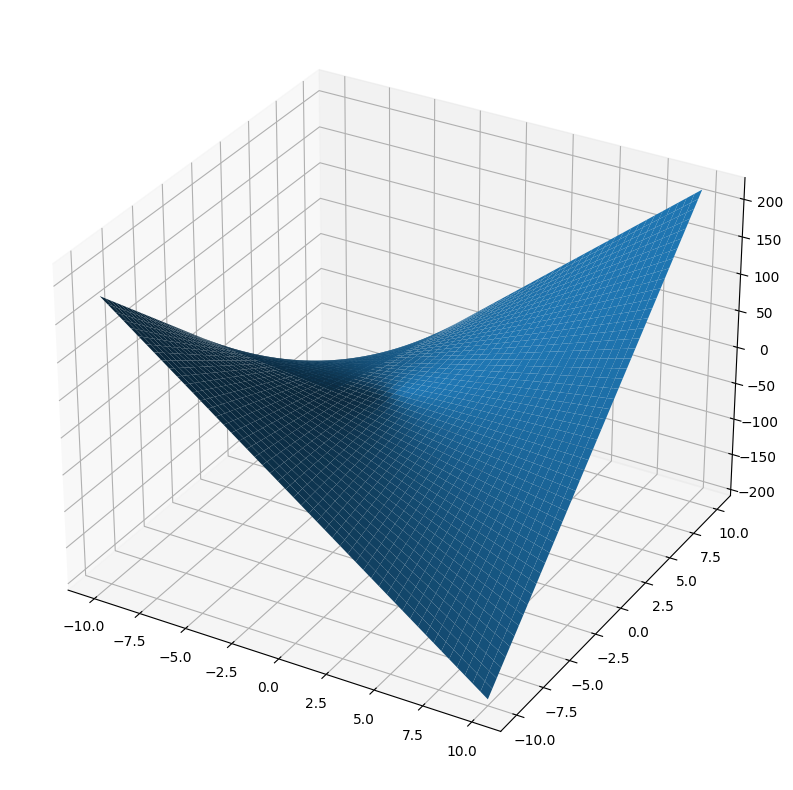

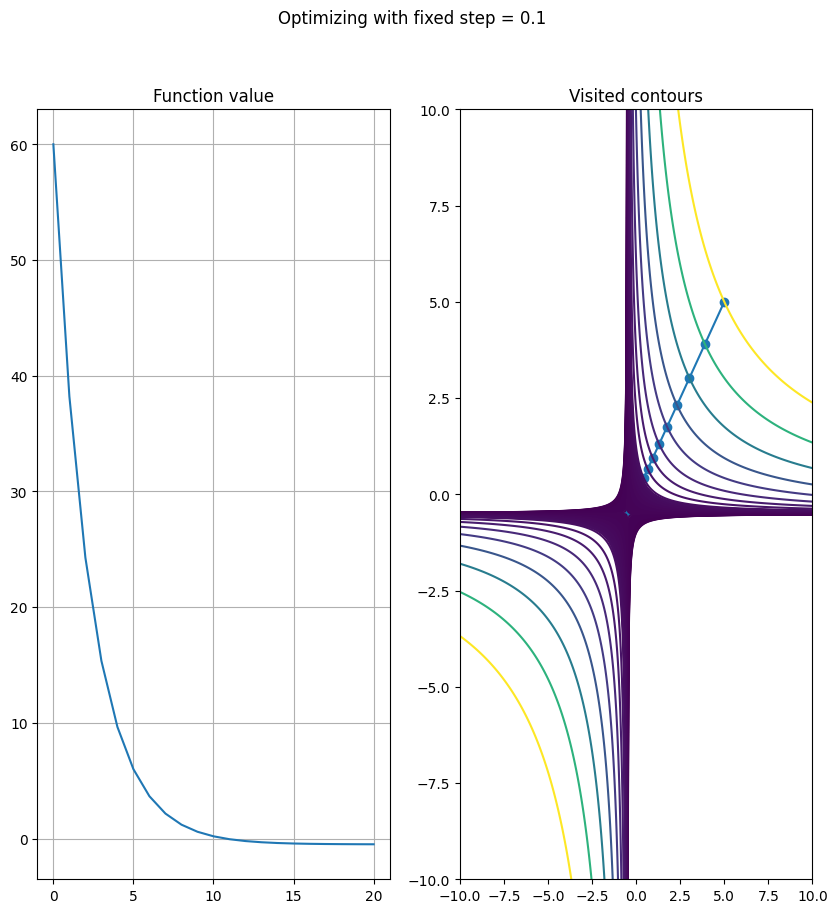

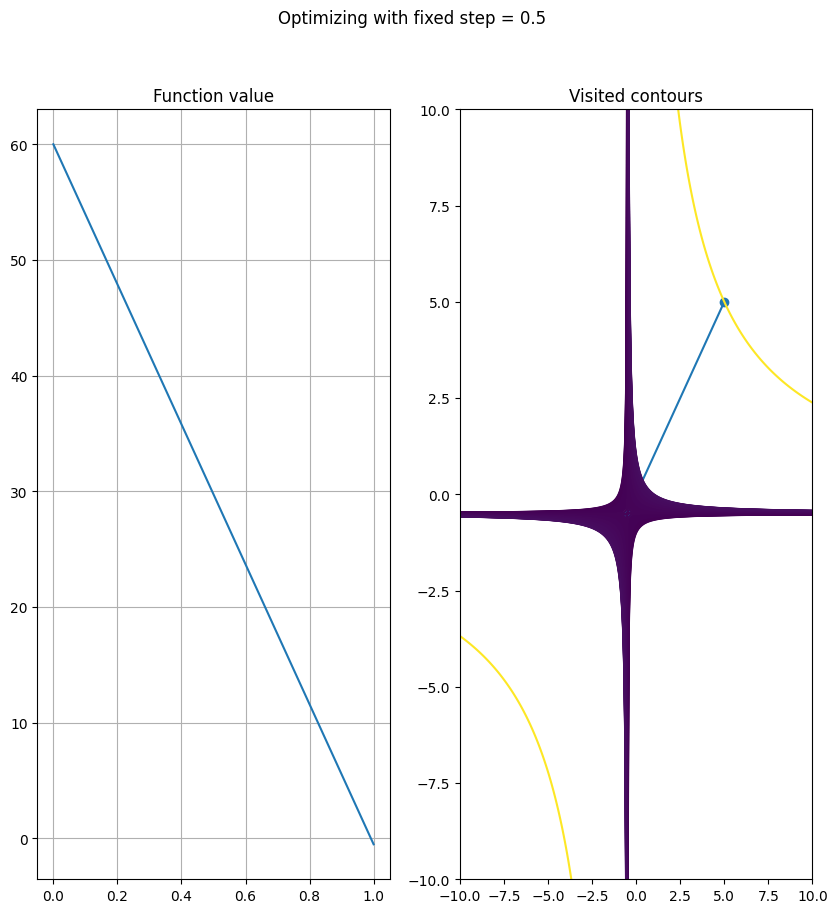

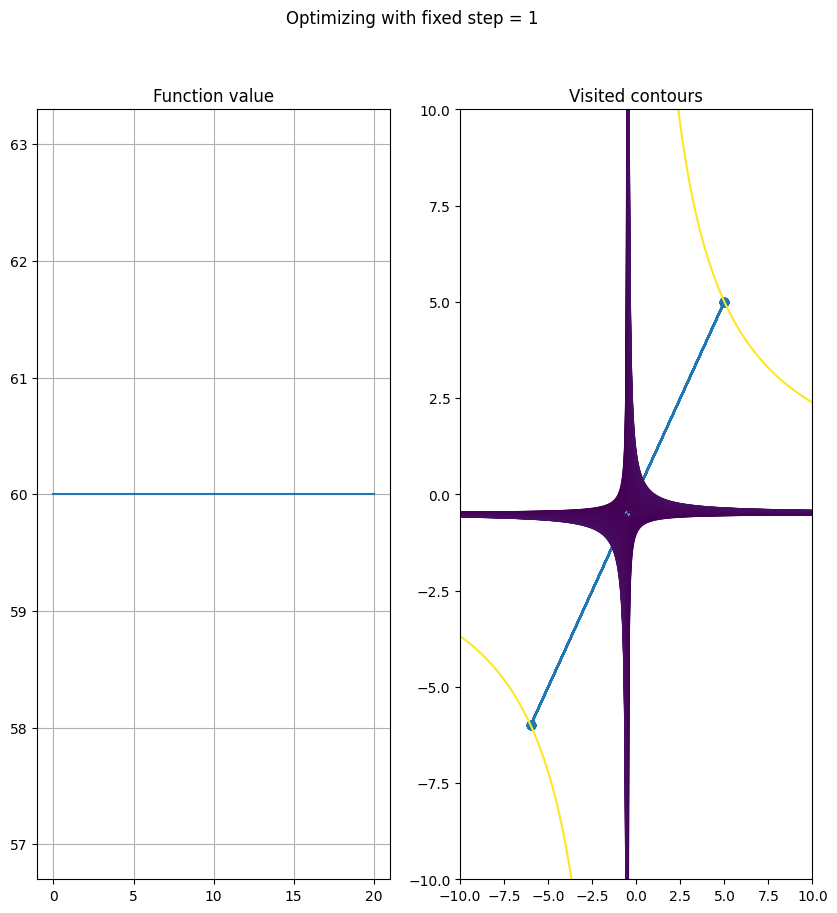

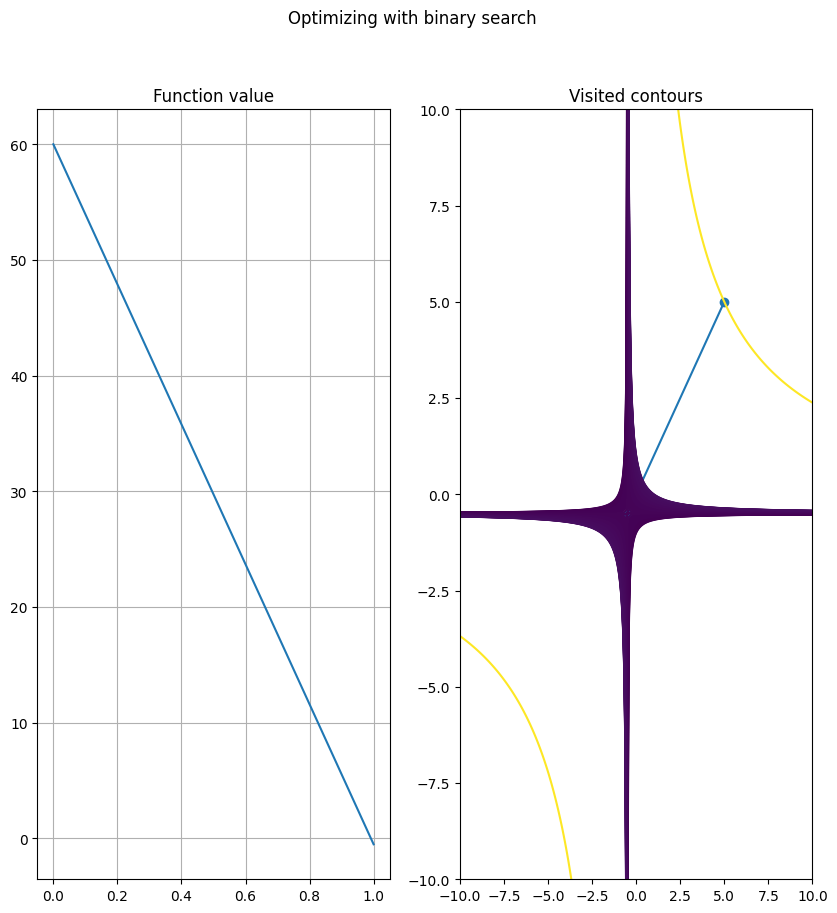

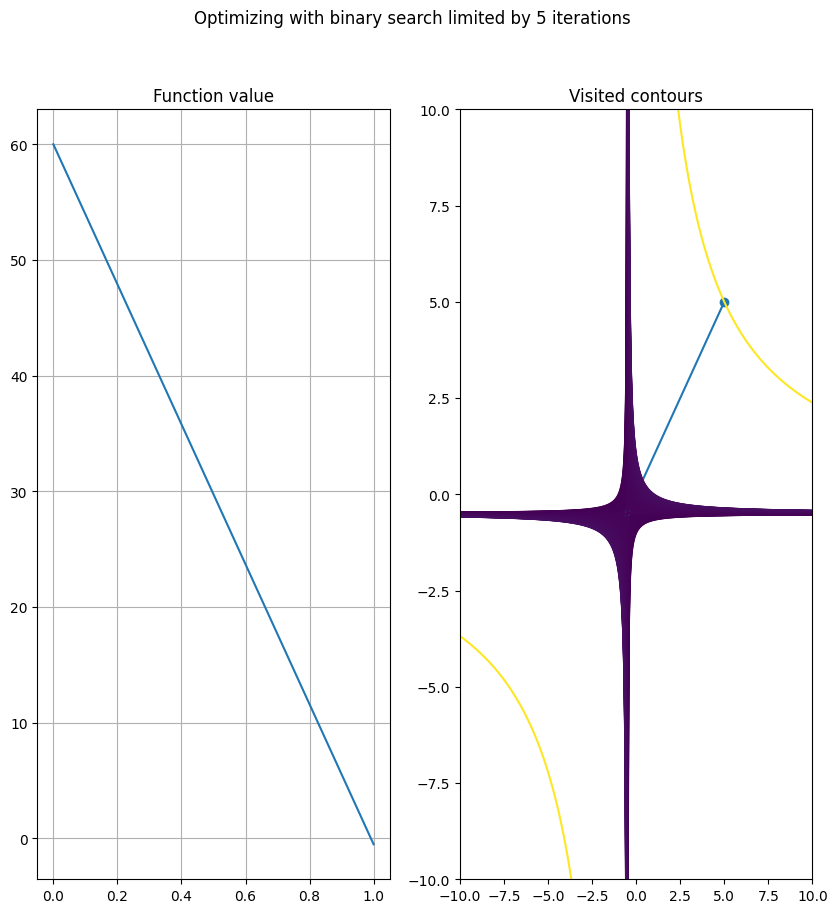

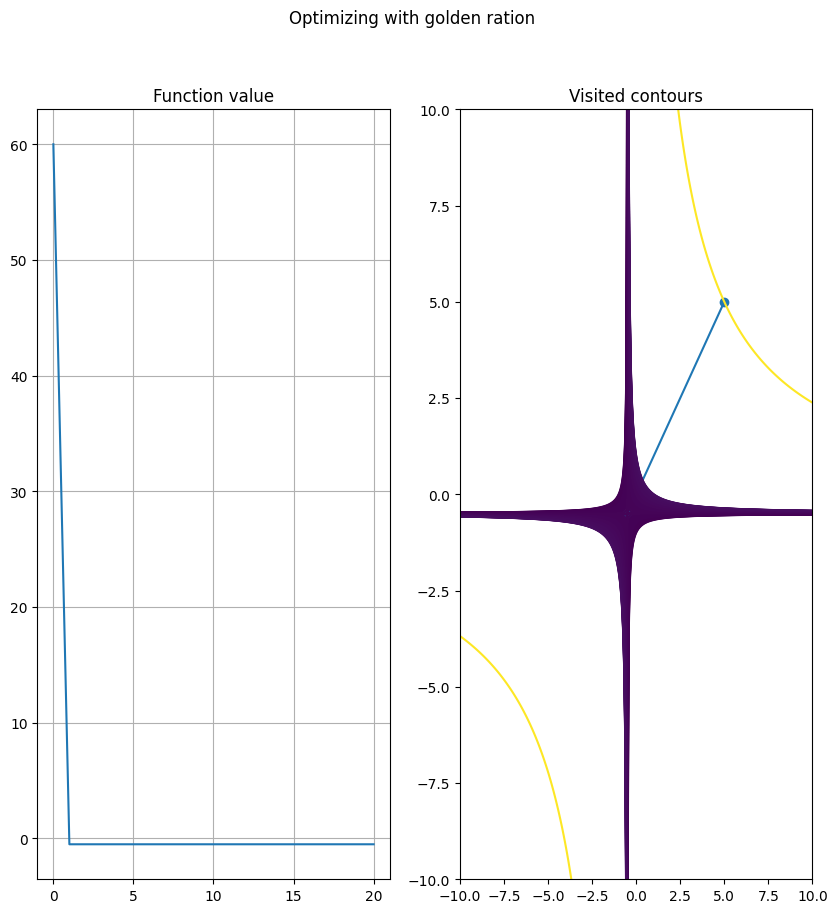

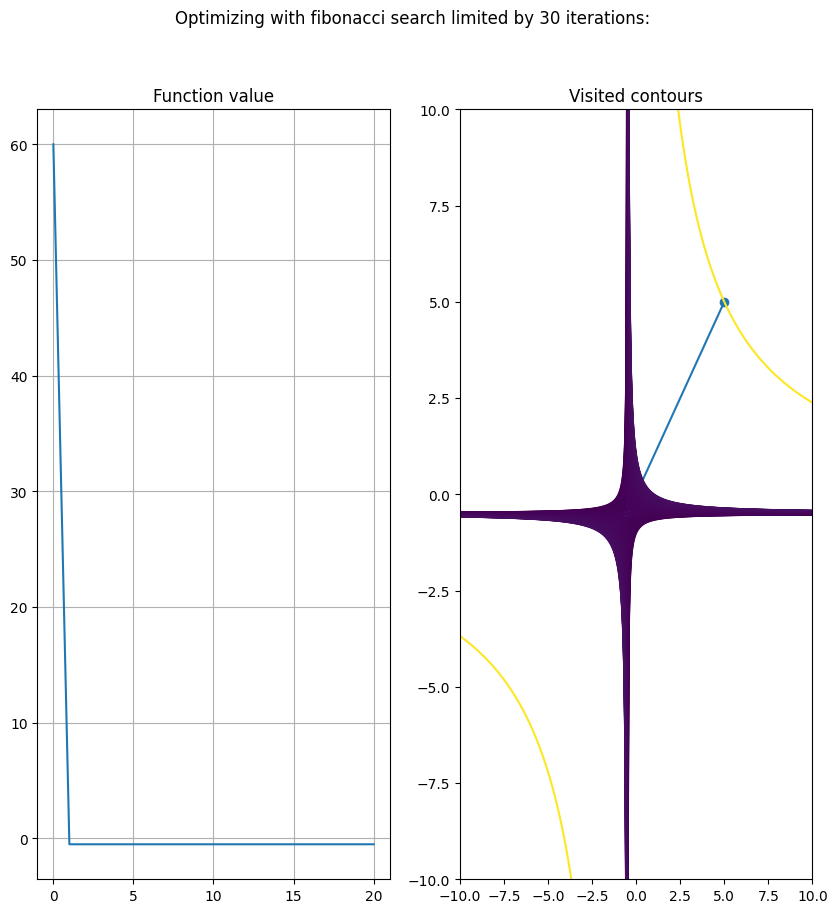

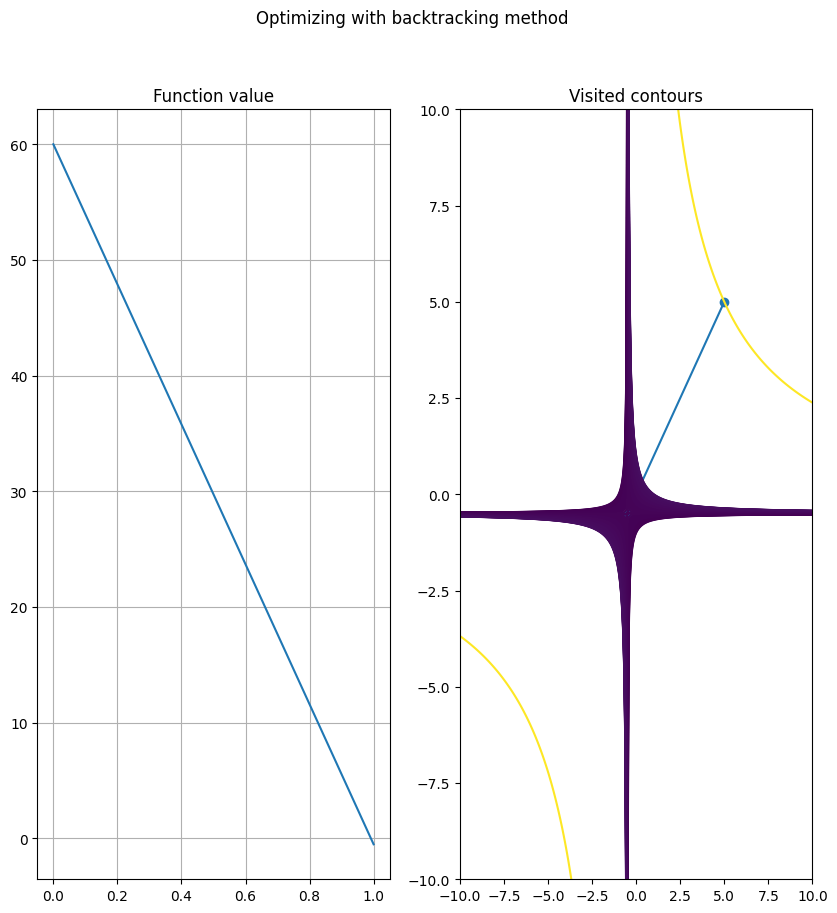

In [13]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.5, 1], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=0, b=2, c=0, d=1, e=1)

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[  -5.            5.        ]
 [  -6.1           5.9       ]
 [  -7.38          7.02      ]
 [  -8.884         8.396     ]
 [ -10.6632       10.0728    ]
 [ -12.77776      12.10544   ]
 [ -15.298848     14.560992  ]
 [ -18.3110464    17.5207616 ]
 [ -21.91519872   21.08297088]
 [ -26.2317929    25.36601062]
 [ -31.40499502   30.5123692 ]
 [ -37.60746886   36.69336821]
 [ -45.0461425    44.11486198]
 [ -53.9691149    53.02409048]
 [ -64.67393299   63.71791346]
 [ -77.51751569   76.55270006]
 [ -92.9280557    91.9562032 ]
 [-111.41929634  110.44181434]
 [-133.60765921  132.6256736 ]
 [-160.23279393  159.24720544]
 [-192.18223501  191.19376423]]
Best value found: x* = [-192.18223501  191.19376423] with f(x*) = -73489.07833199302
Optimizing with fixed step = 0.5
Optimizer trajectory:
[[-5.0000000e+00  5.0000000e+00]
 [-1.0500000e+01  9.5000000e+00]
 [-2.0500000e+01  1.9500000e+01]
 [-4.0500000e+01  3.9500000e+01]
 [-8.0

OverflowError: (34, 'Result too large')

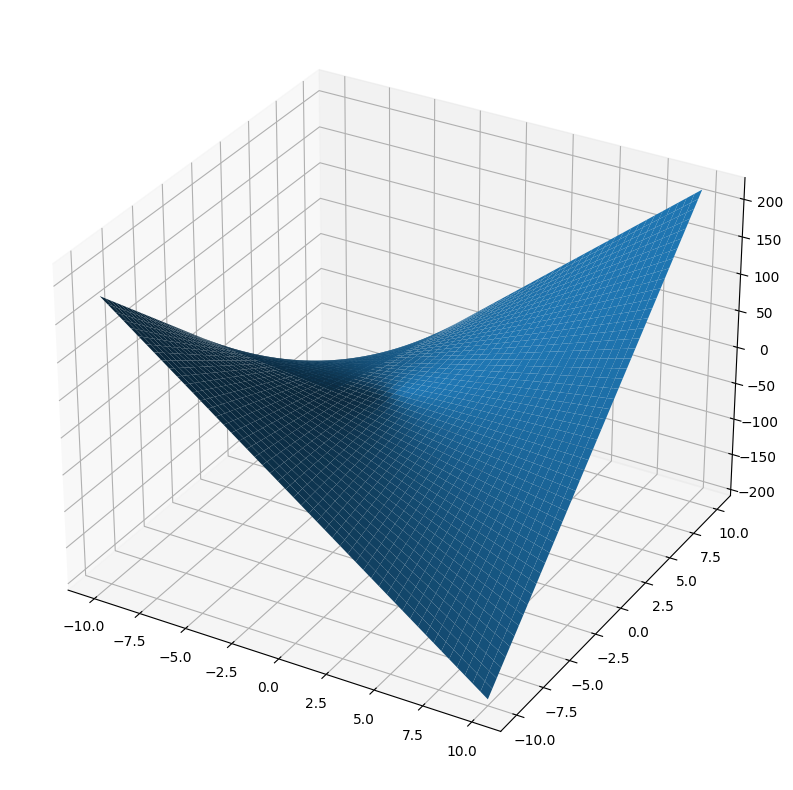

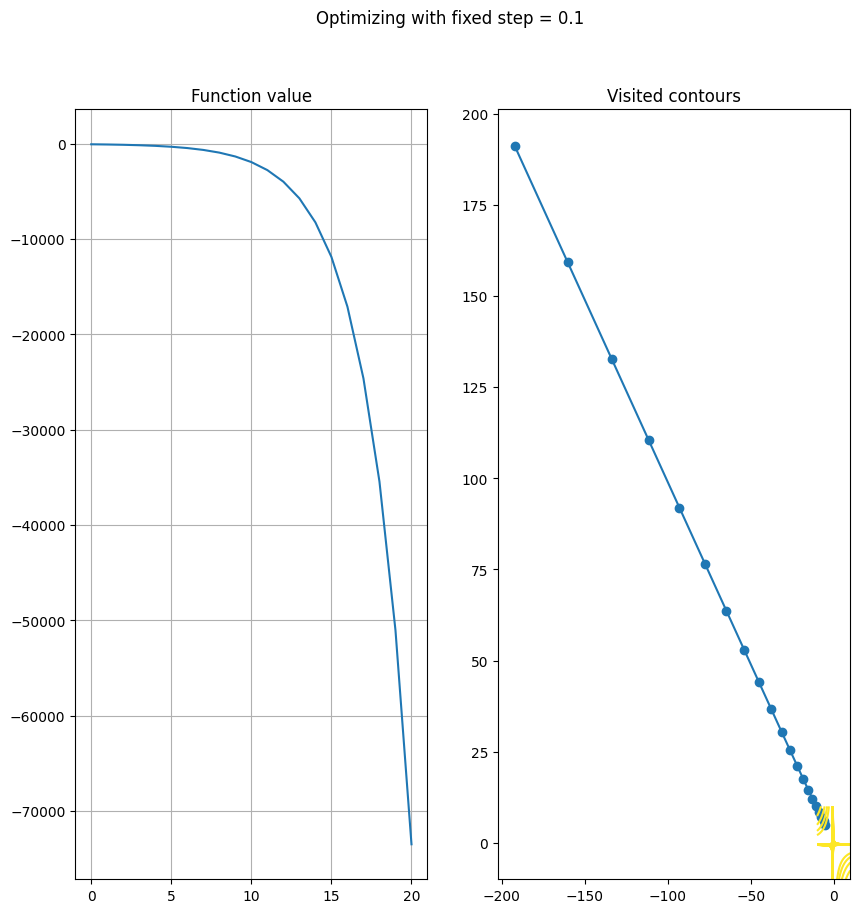

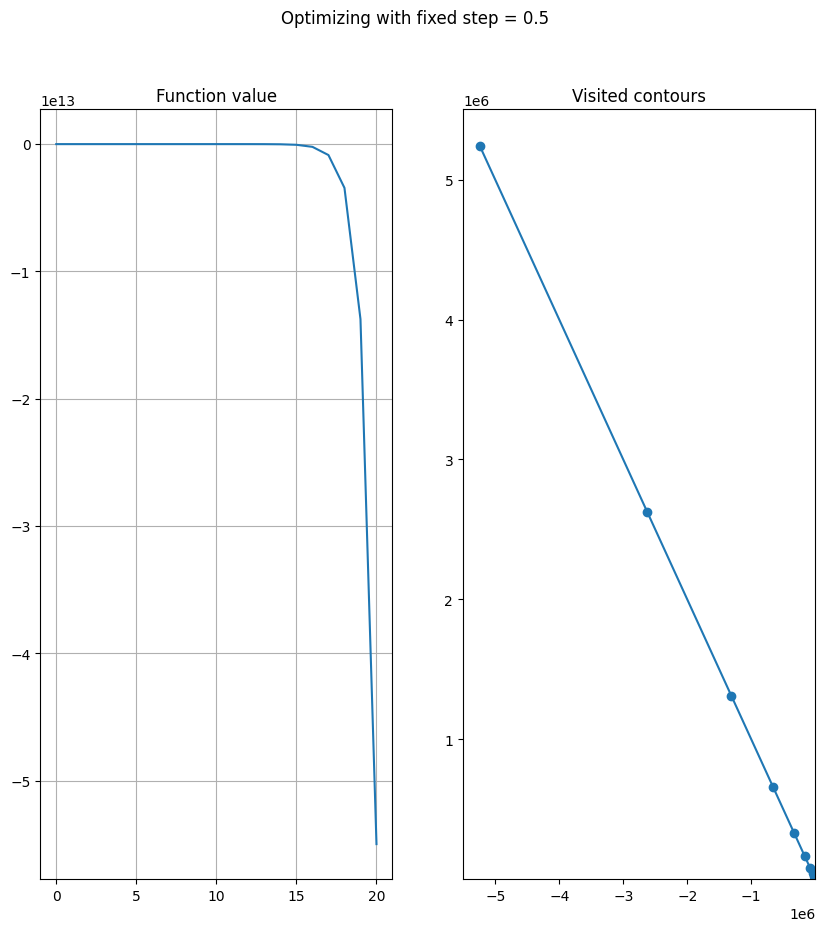

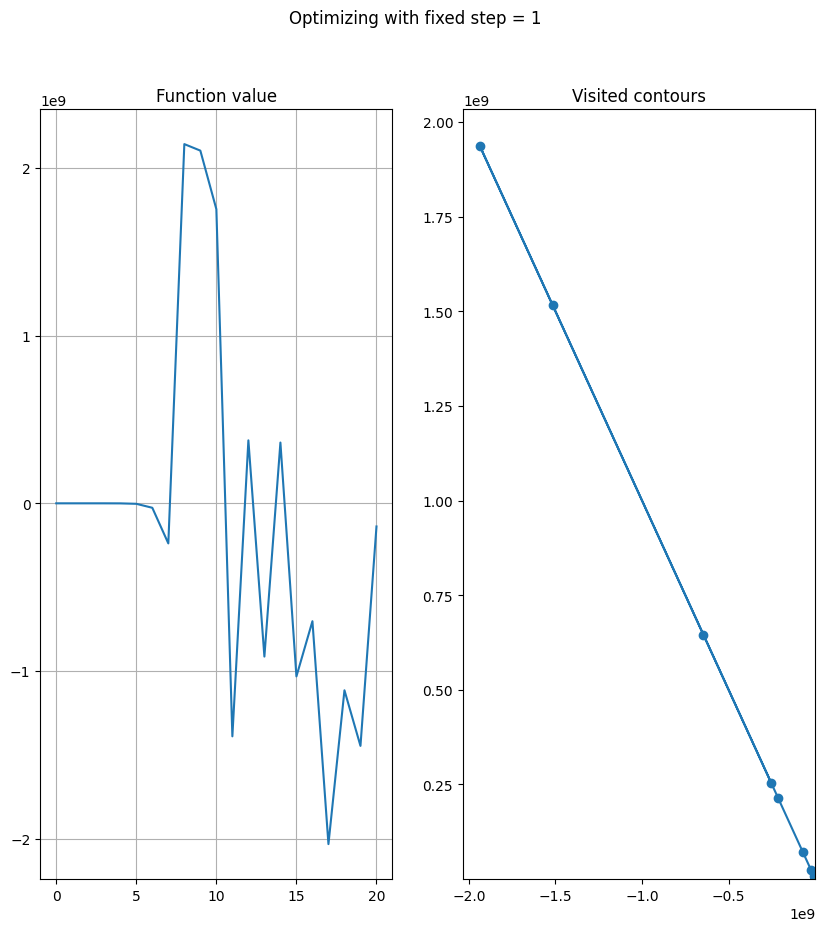

In [14]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.5, 1], x0=np.array([-5, 5]), bin_iters=5, fib_iters=30, a=0, b=2, c=0, d=1, e=1)

## Случай параболы в сечении

У функции нет глобального минимума, но есть направление для убывания. В виду метод будет сходиться, кроме случая слишком большого шага.

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[5.00000000e+00 5.00000000e+00]
 [4.80000000e+00 2.00000000e+00]
 [4.60000000e+00 8.00000000e-01]
 [4.40000000e+00 3.20000000e-01]
 [4.20000000e+00 1.28000000e-01]
 [4.00000000e+00 5.12000000e-02]
 [3.80000000e+00 2.04800000e-02]
 [3.60000000e+00 8.19200000e-03]
 [3.40000000e+00 3.27680000e-03]
 [3.20000000e+00 1.31072000e-03]
 [3.00000000e+00 5.24288000e-04]
 [2.80000000e+00 2.09715200e-04]
 [2.60000000e+00 8.38860800e-05]
 [2.40000000e+00 3.35544320e-05]
 [2.20000000e+00 1.34217728e-05]
 [2.00000000e+00 5.36870912e-06]
 [1.80000000e+00 2.14748365e-06]
 [1.60000000e+00 8.58993459e-07]
 [1.40000000e+00 3.43597384e-07]
 [1.20000000e+00 1.37438953e-07]
 [1.00000000e+00 5.49755814e-08]]
Best value found: x* = [1.00000000e+00 5.49755814e-08] with f(x*) = 2.0000000000000044
Optimizing with fixed step = 0.5
Optimizer trajectory:
[[ 5.00000e+00  5.00000e+00]
 [ 4.00000e+00 -1.00000e+01]
 [ 3.00000e+00  2.00000e+01]
 [ 2.00

C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:10: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: np.array([2 * a * x[0] + b * x[1] + d, 2 * c * x[1] + b * x[0] + e])
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]


Optimizing with binary search
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [ 4.66517639e+00 -2.23541260e-02]
 [-6.97856750e+01  4.97049701e+00]
 [-7.01205139e+01 -2.24497546e-02]
 [-1.43941284e+02  4.94932477e+00]
 [-1.44276138e+02 -2.25806901e-02]
 [-2.17247131e+02  4.92062545e+00]
 [-2.17582001e+02 -2.26750013e-02]
 [-2.89950012e+02  4.90015926e+00]
 [-2.90284897e+02 -2.28050014e-02]
 [-3.61833984e+02  4.87222613e+00]
 [-3.62168884e+02 -2.28980354e-02]
 [-4.33140457e+02  4.85243073e+00]
 [-4.33475372e+02 -2.30271295e-02]
 [-5.03657135e+02  4.82522648e+00]
 [-5.03992065e+02 -2.31189135e-02]
 [-5.73620331e+02  4.80607062e+00]
 [-5.73955276e+02 -2.32471372e-02]
 [-6.42821228e+02  4.77956154e+00]
 [-6.43156189e+02 -2.33377028e-02]
 [-7.11491272e+02  4.76101388e+00]]
Best value found: x* = [-711.49127197    4.76101388] with f(x*) = -1354.9807844441236
Optimizing with binary search limited by 5 iterations
Optimizer trajectory:
[[ 5.          5.        ]
 [ 4.625      -0.625   

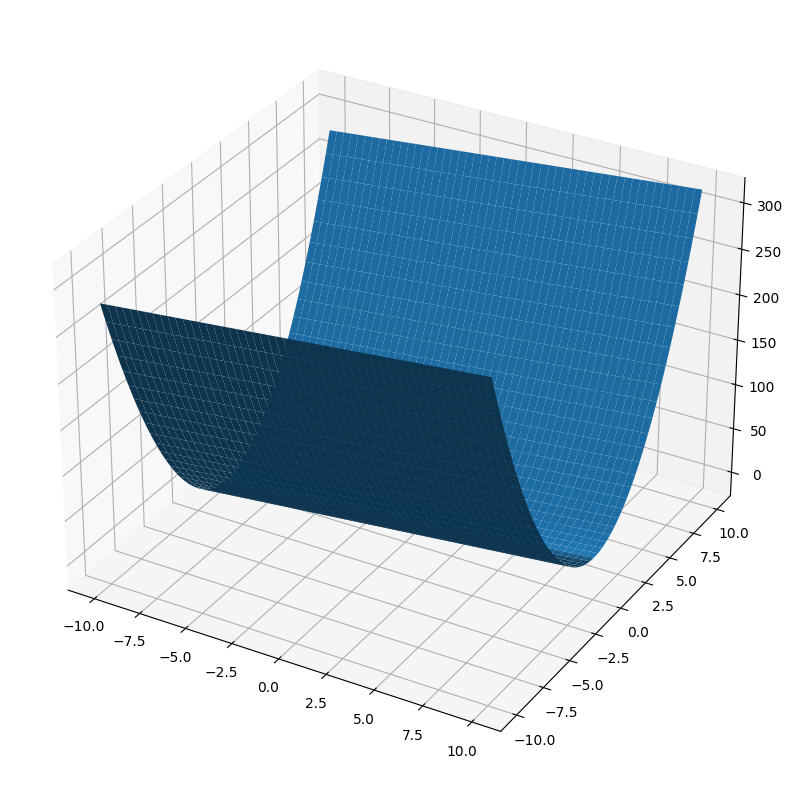

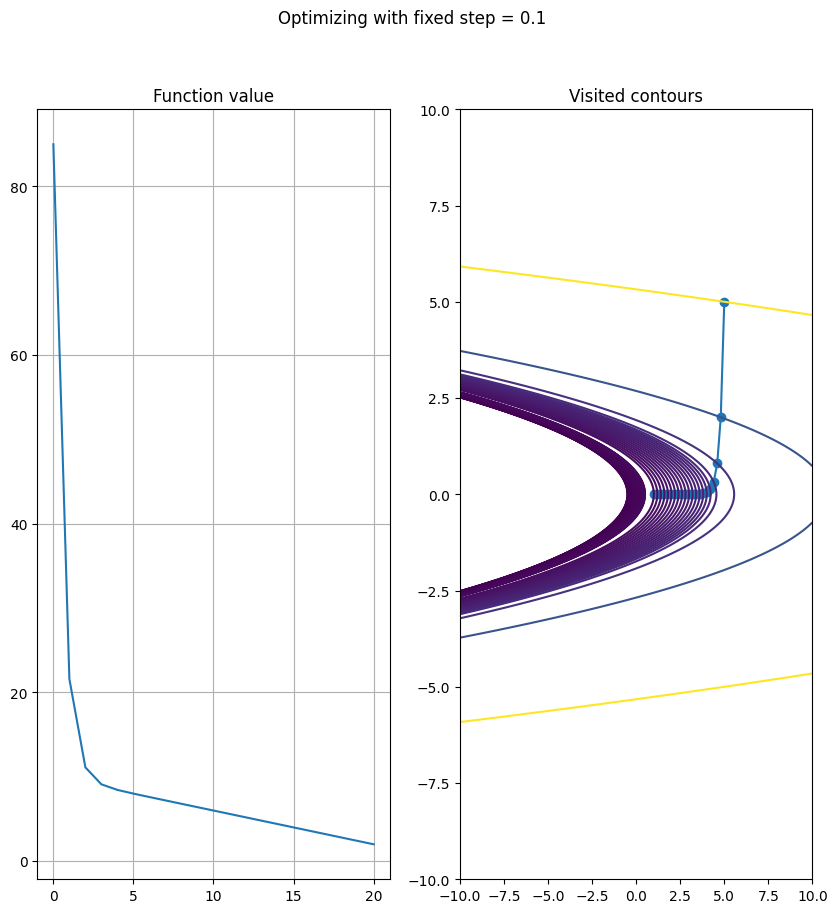

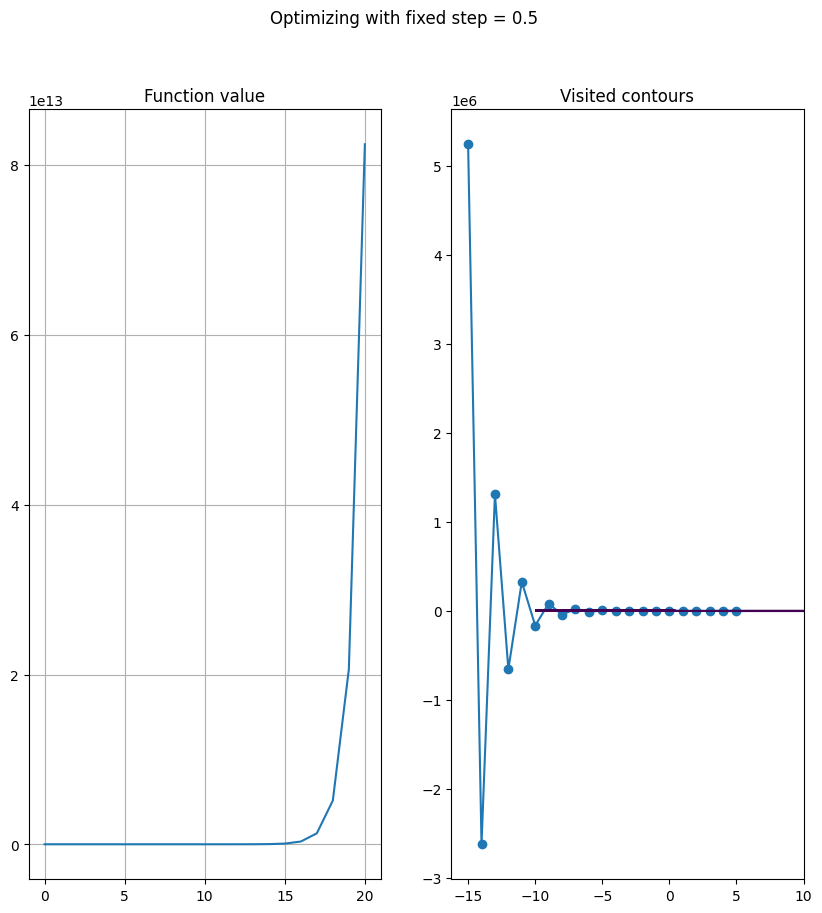

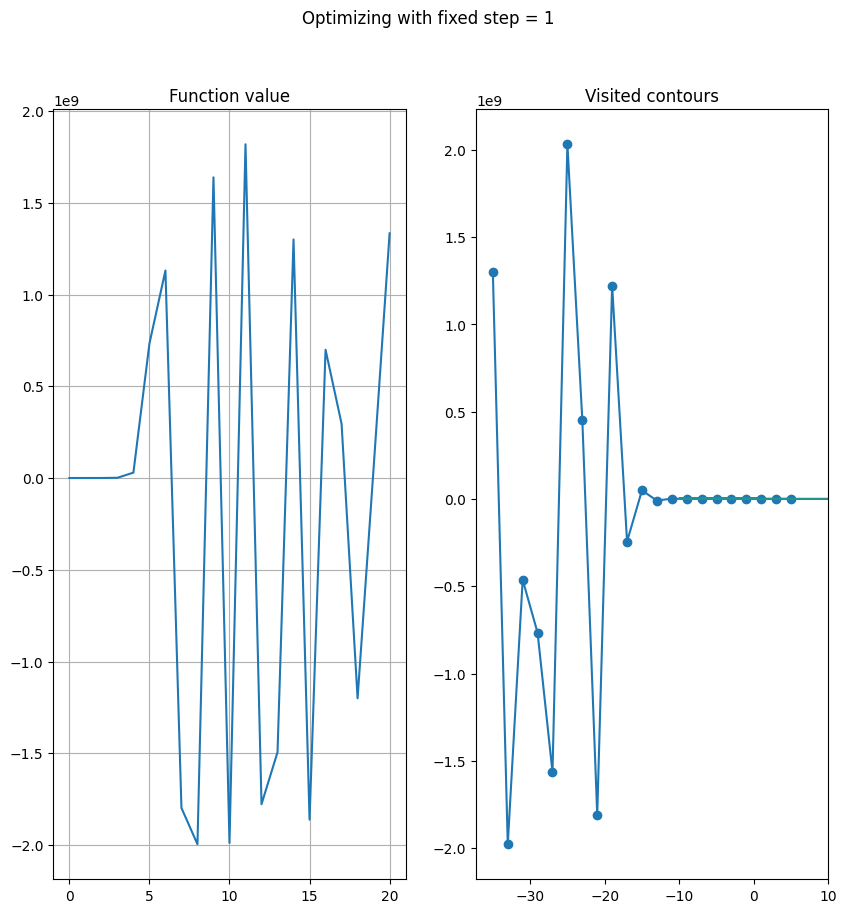

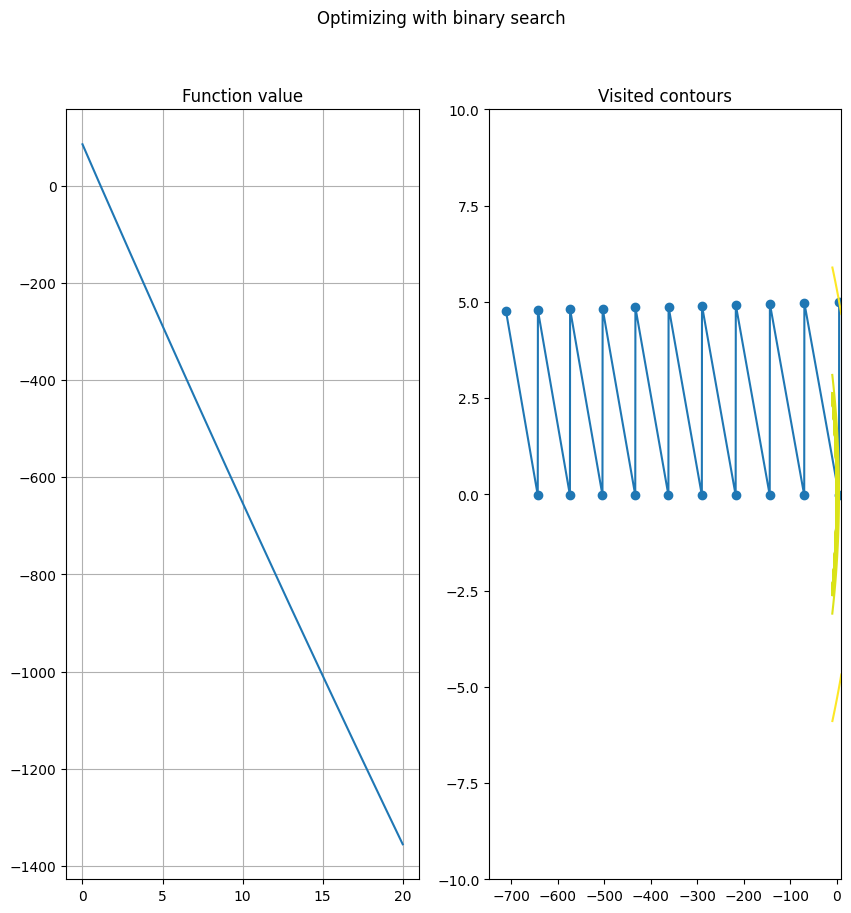

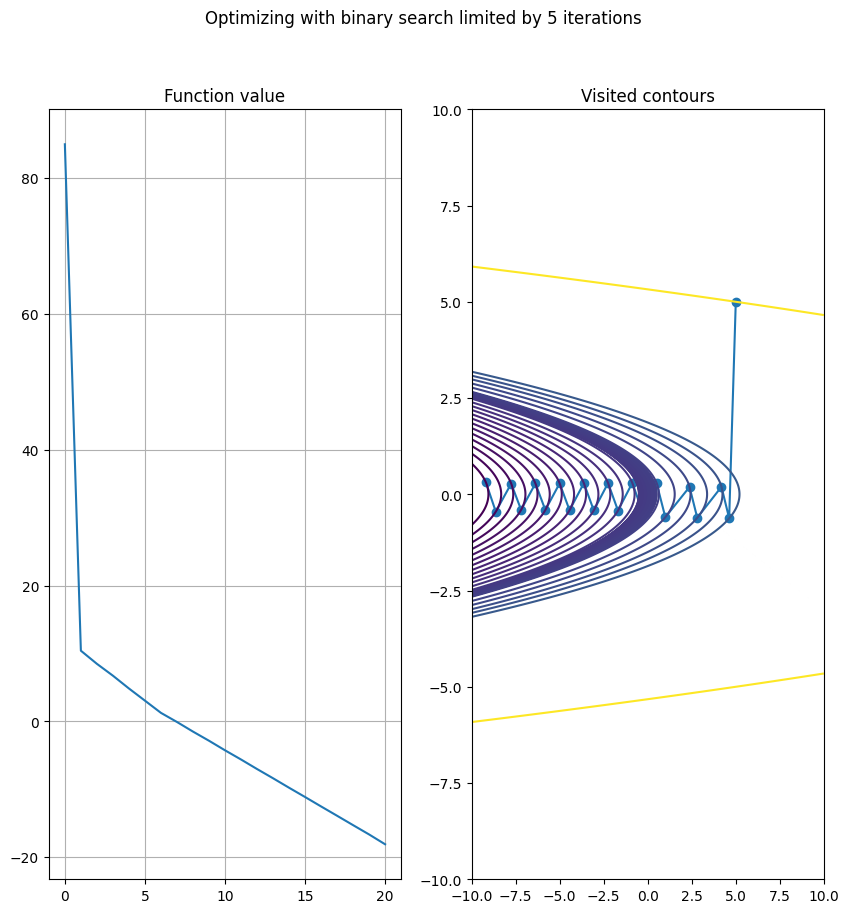

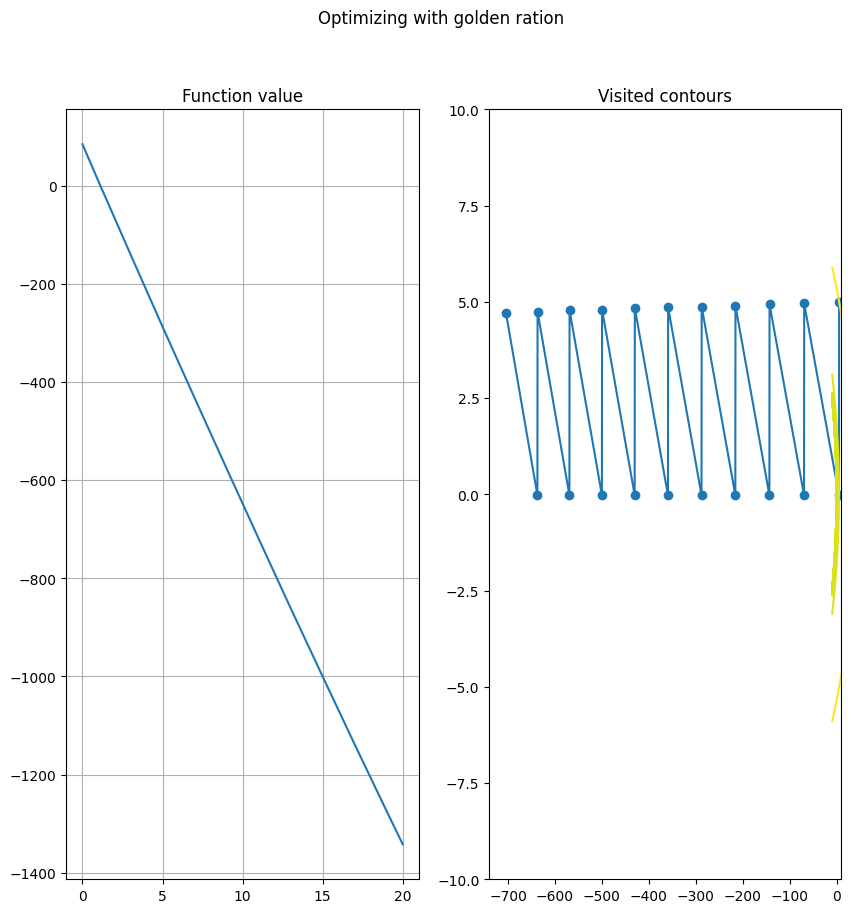

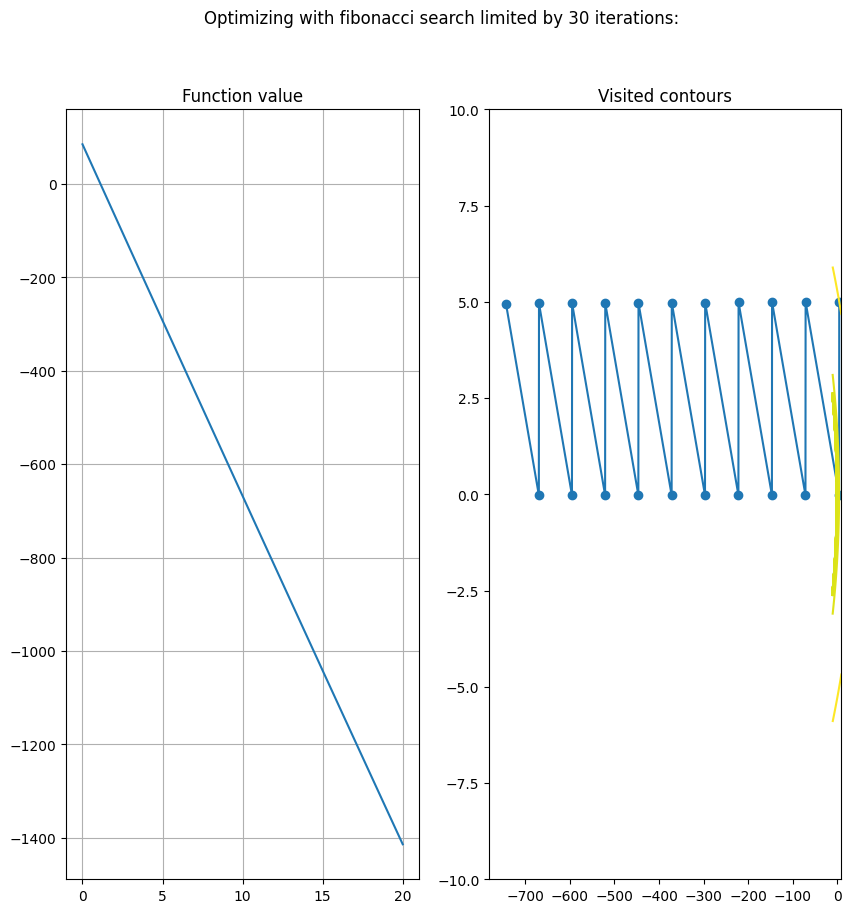

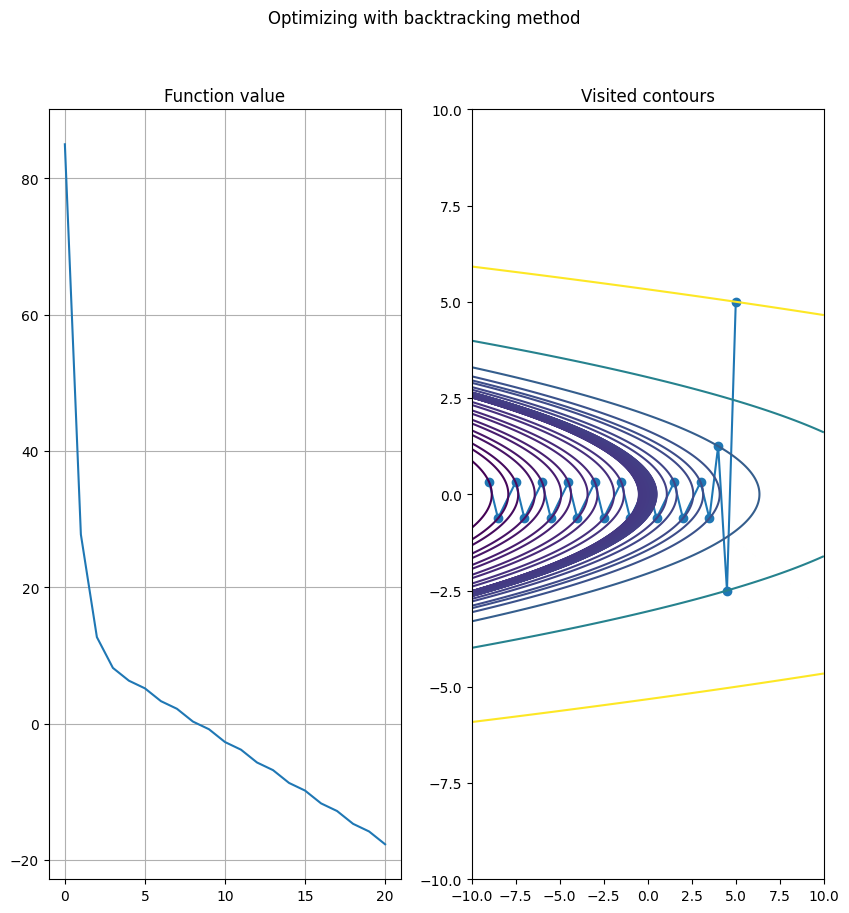

In [15]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.5, 1], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=0, b=0, c=3, d=2, e=0)

## Анализ преобразований над квадратичными формами

Возможные преобразования:
1. Добавление константы -- минимум меняется на ту же константу, траектория поиска никак не меняется.
2. Сдвиг координат -- траектория не меняется.
3. Равномерное растяжение координат -- траектория не меняется.
4. Неравномерное растяжение координат -- траектория не меняется.

## Сдвиг координат

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [ 1.80000000e+00  1.90000000e+00]
 [ 5.00000000e-01  6.80000000e-01]
 [-3.60000000e-02  2.08000000e-01]
 [-2.63200000e-01  3.20000000e-02]
 [-3.64320000e-01 -2.81600000e-02]
 [-4.12960000e-01 -4.40320000e-02]
 [-4.38969600e-01 -4.38272000e-02]
 [-4.54616320e-01 -3.85024000e-02]
 [-4.65069312e-01 -3.21781760e-02]
 [-4.72605952e-01 -2.62930432e-02]
 [-4.78304963e-01 -2.12546355e-02]
 [-4.82732050e-01 -1.70917888e-02]
 [-4.86220872e-01 -1.37086632e-02]
 [-4.88990791e-01 -1.09810234e-02]
 [-4.91198270e-01 -8.79045588e-03]
 [-4.92960871e-01 -7.03461956e-03]
 [-4.94369599e-01 -5.62859759e-03]
 [-4.95496040e-01 -4.50323885e-03]
 [-4.96396976e-01 -3.60273539e-03]
 [-4.97117639e-01 -2.88224604e-03]]
Best value found: x* = [-0.49711764 -0.00288225] with f(x*) = -0.49998338465003267
Optimizing with fixed step = 0.3
Optimizer trajectory:
[[ 5.          5.        ]
 [-4.6        -4.3       ]
 [

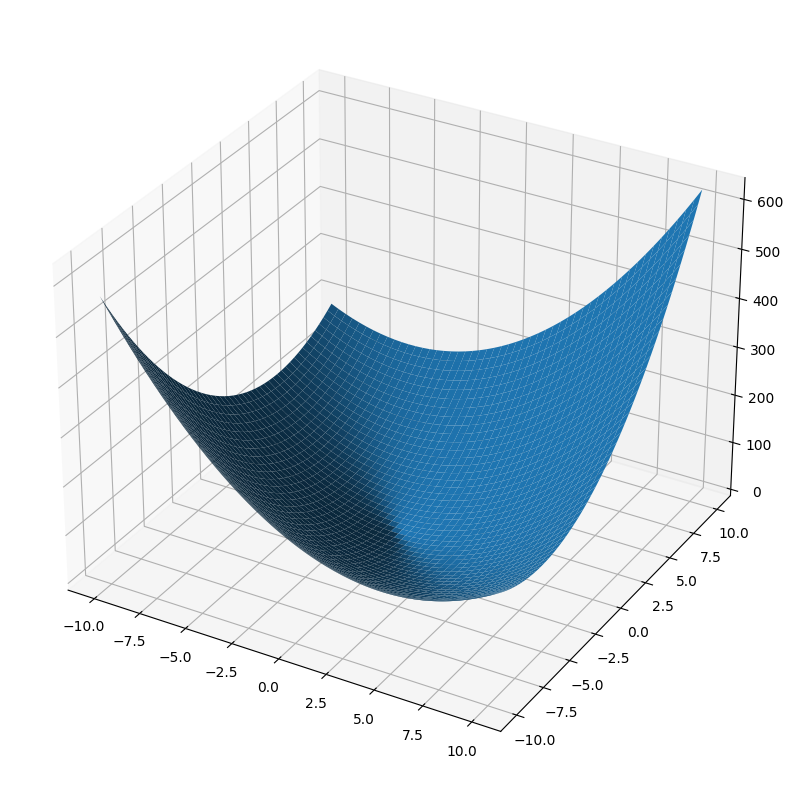

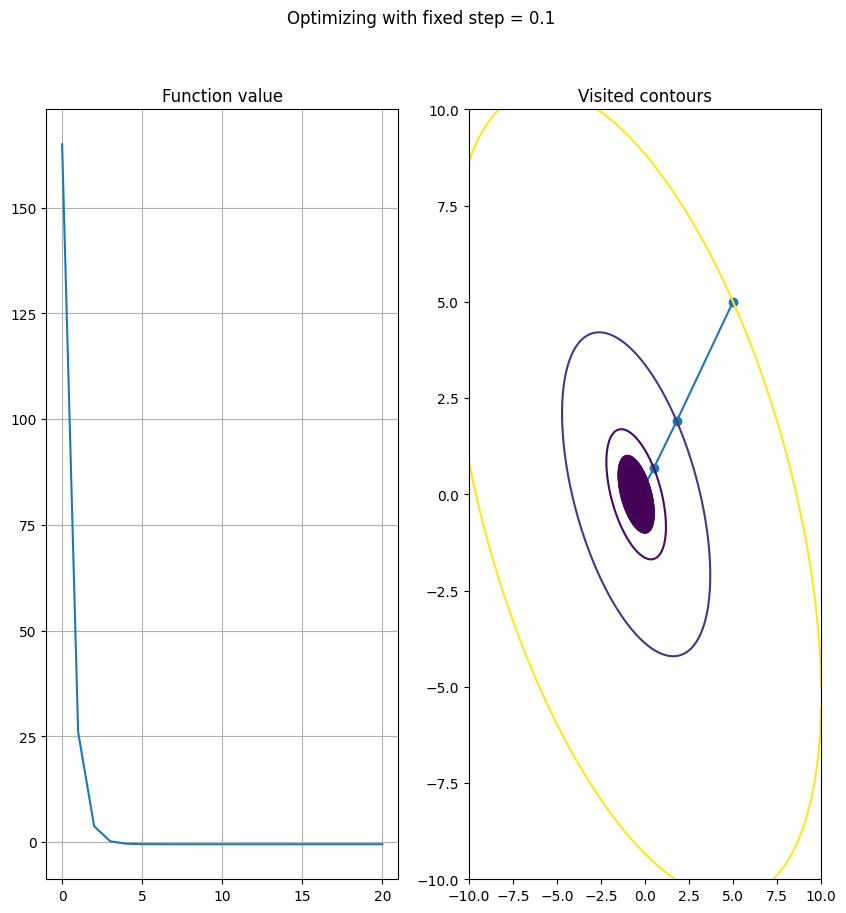

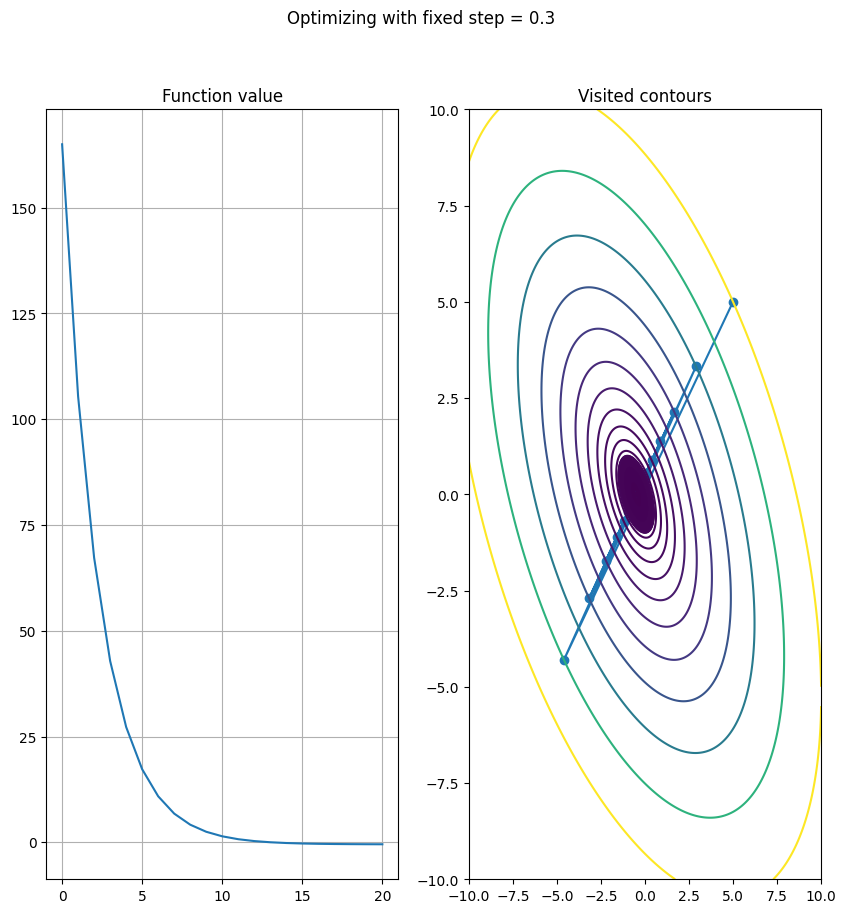

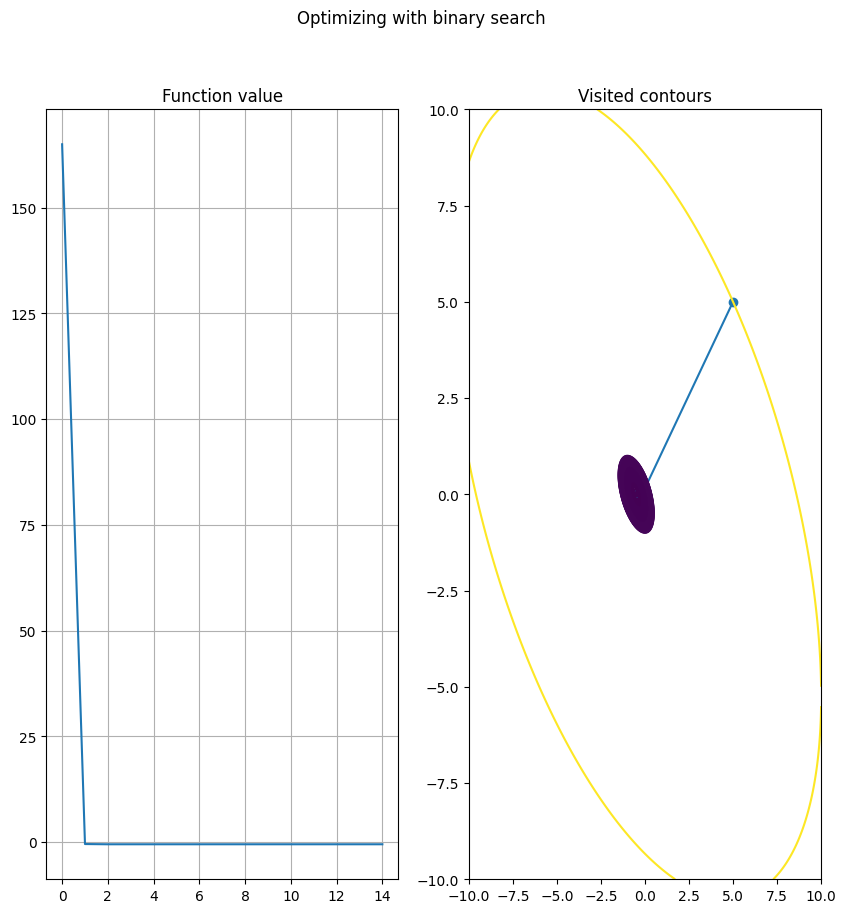

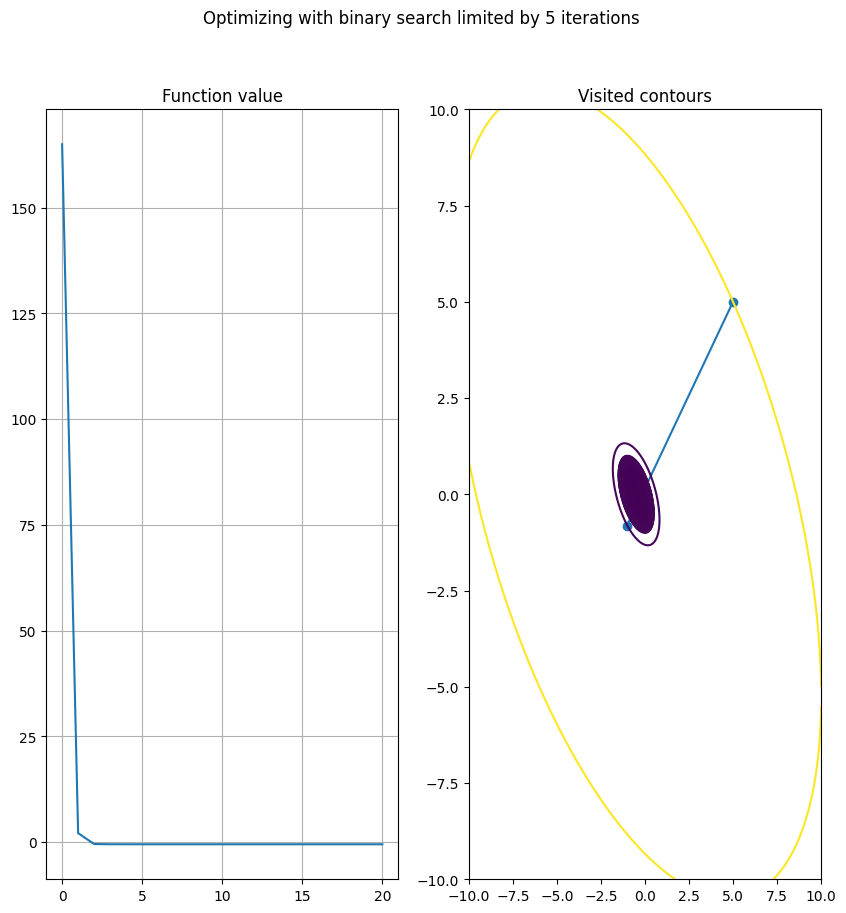

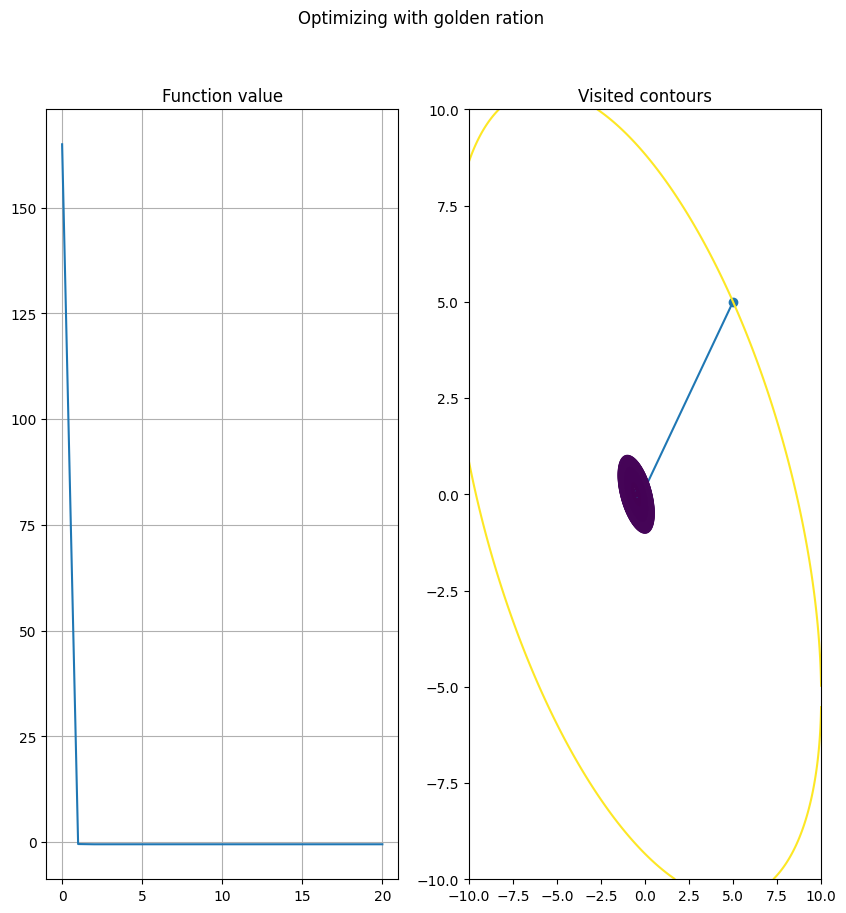

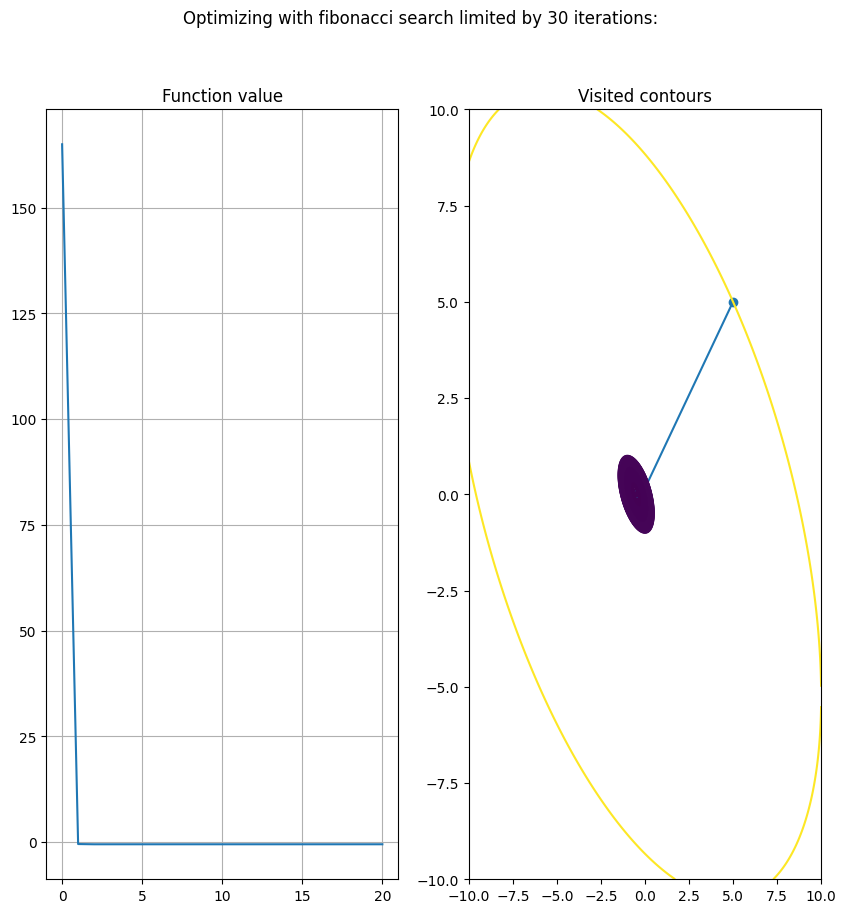

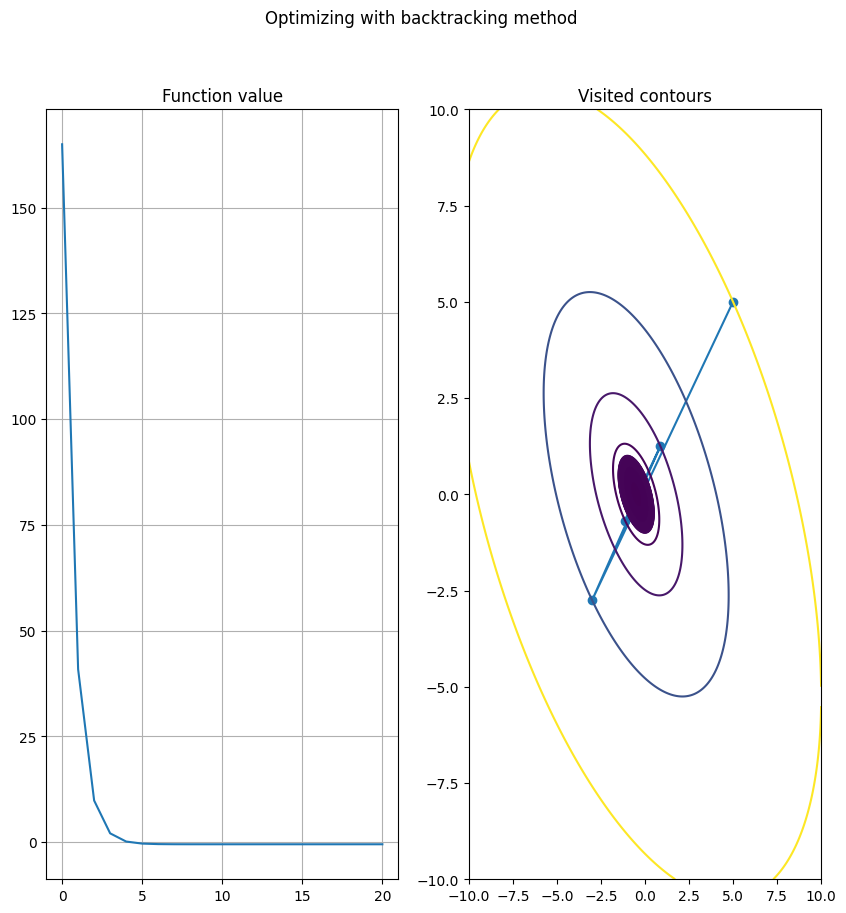

In [16]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.3], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=2, b=2, c=2, d=2, e=1)

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[5.00000000e+00 5.00000000e+00]
 [2.00000000e+00 2.00000000e+00]
 [8.00000000e-01 8.00000000e-01]
 [3.20000000e-01 3.20000000e-01]
 [1.28000000e-01 1.28000000e-01]
 [5.12000000e-02 5.12000000e-02]
 [2.04800000e-02 2.04800000e-02]
 [8.19200000e-03 8.19200000e-03]
 [3.27680000e-03 3.27680000e-03]
 [1.31072000e-03 1.31072000e-03]
 [5.24288000e-04 5.24288000e-04]
 [2.09715200e-04 2.09715200e-04]
 [8.38860800e-05 8.38860800e-05]
 [3.35544320e-05 3.35544320e-05]
 [1.34217728e-05 1.34217728e-05]
 [5.36870912e-06 5.36870912e-06]
 [2.14748365e-06 2.14748365e-06]
 [8.58993459e-07 8.58993459e-07]
 [3.43597384e-07 3.43597384e-07]
 [1.37438953e-07 1.37438953e-07]
 [5.49755814e-08 5.49755814e-08]]
Best value found: x* = [5.49755814e-08 5.49755814e-08] with f(x*) = 1.813388729421935e-14
Optimizing with fixed step = 0.3
Optimizer trajectory:
[[ 5.          5.        ]
 [-4.         -4.        ]
 [ 3.2         3.2       ]
 [-2.56   

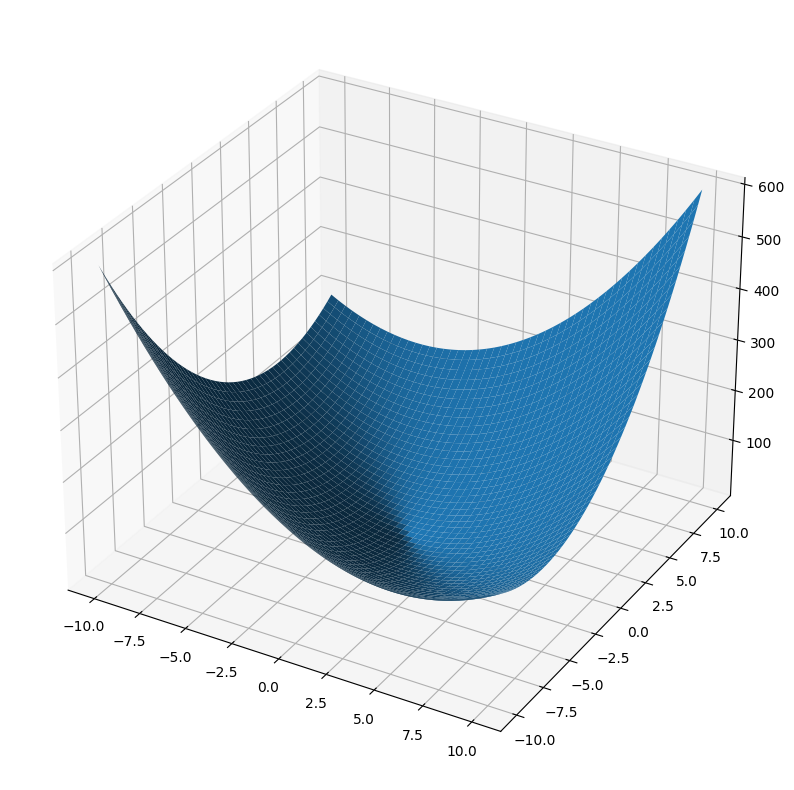

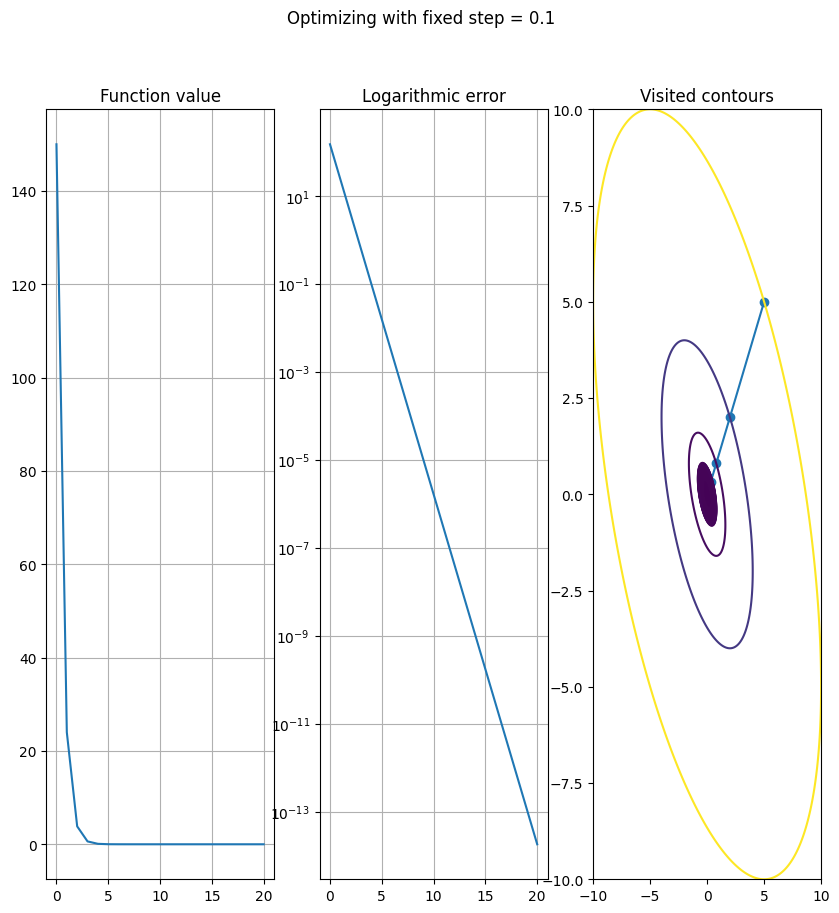

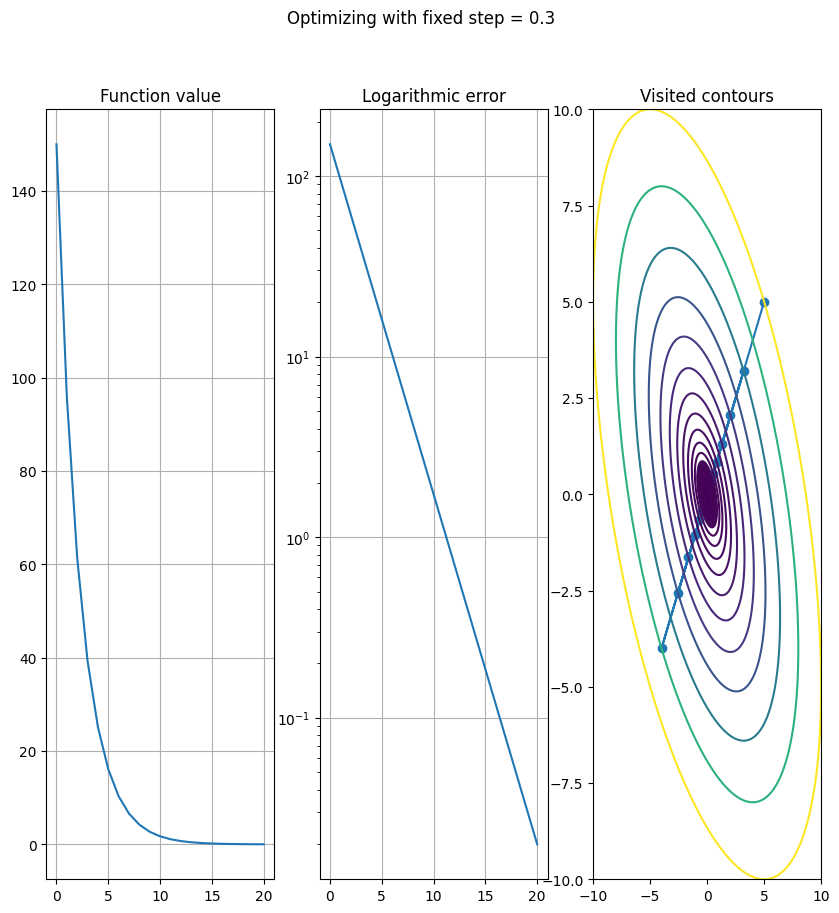

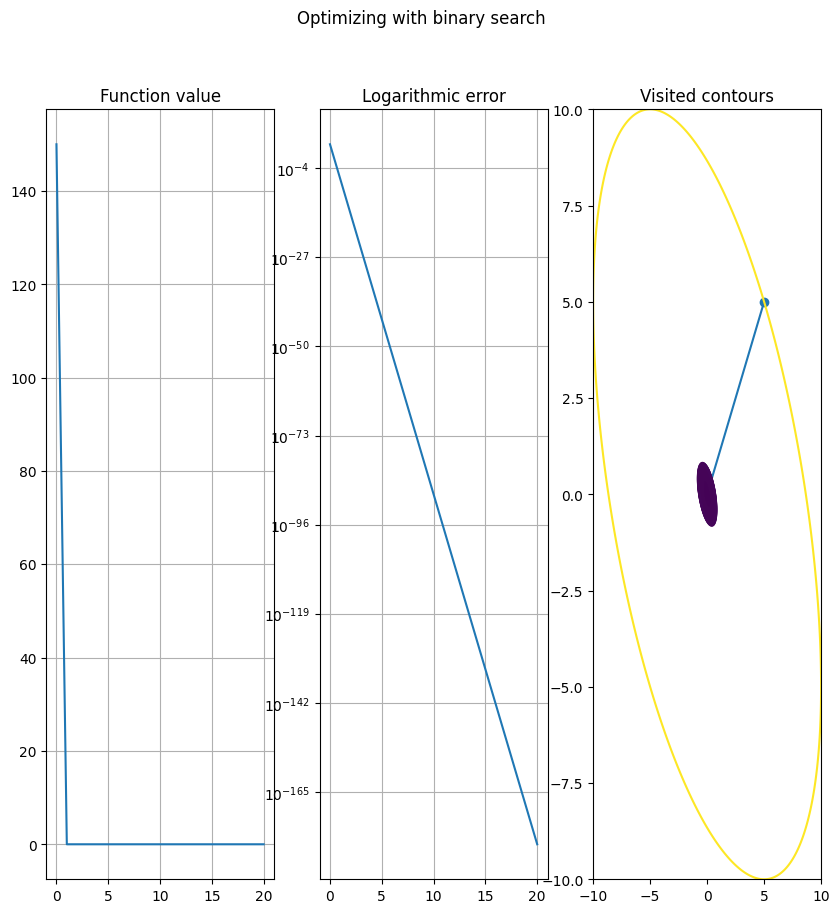

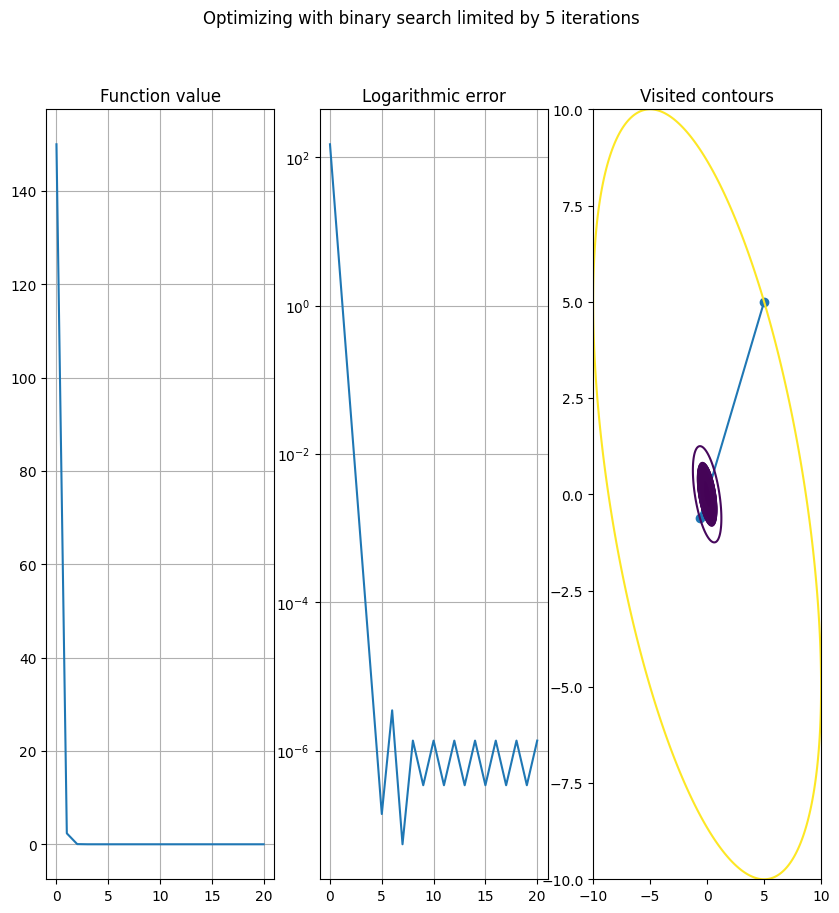

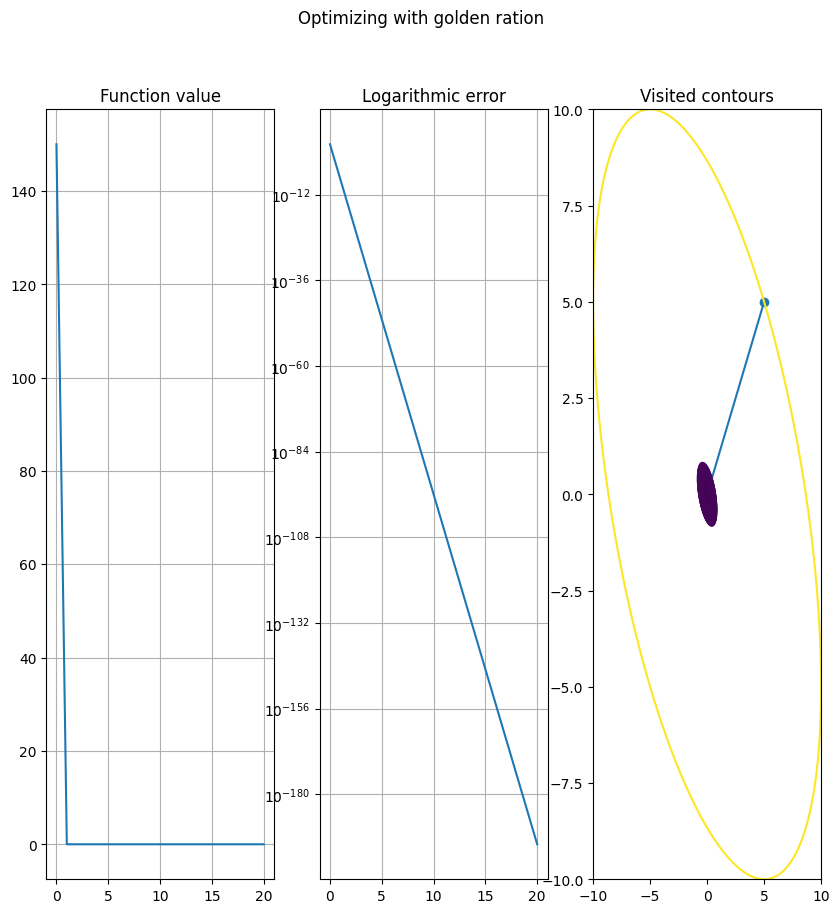

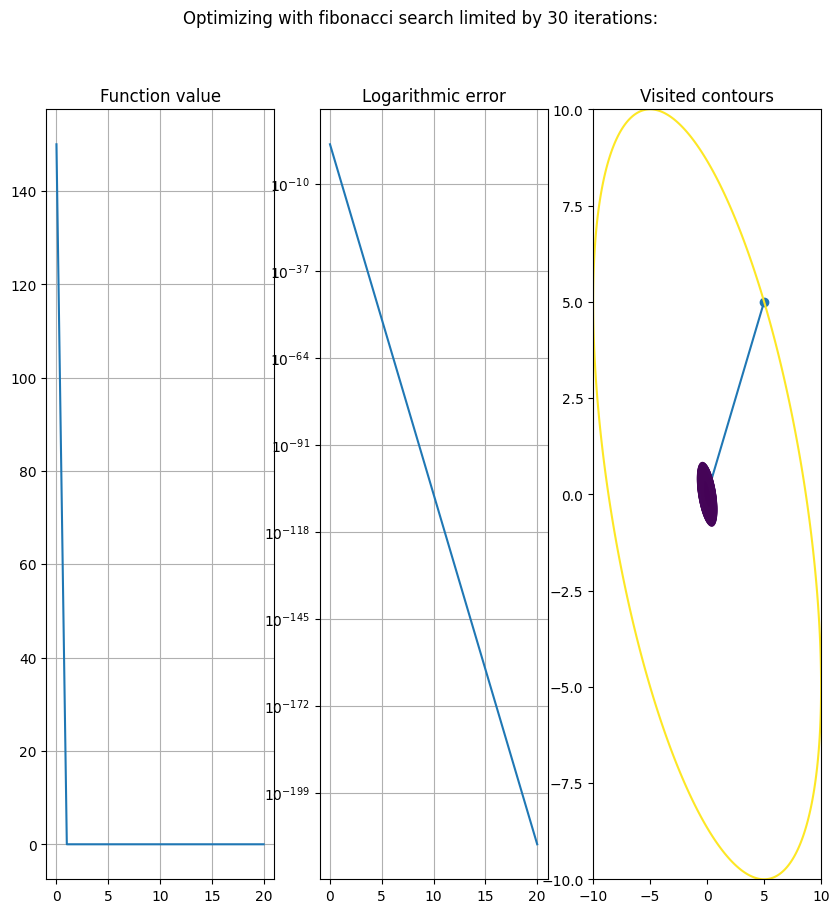

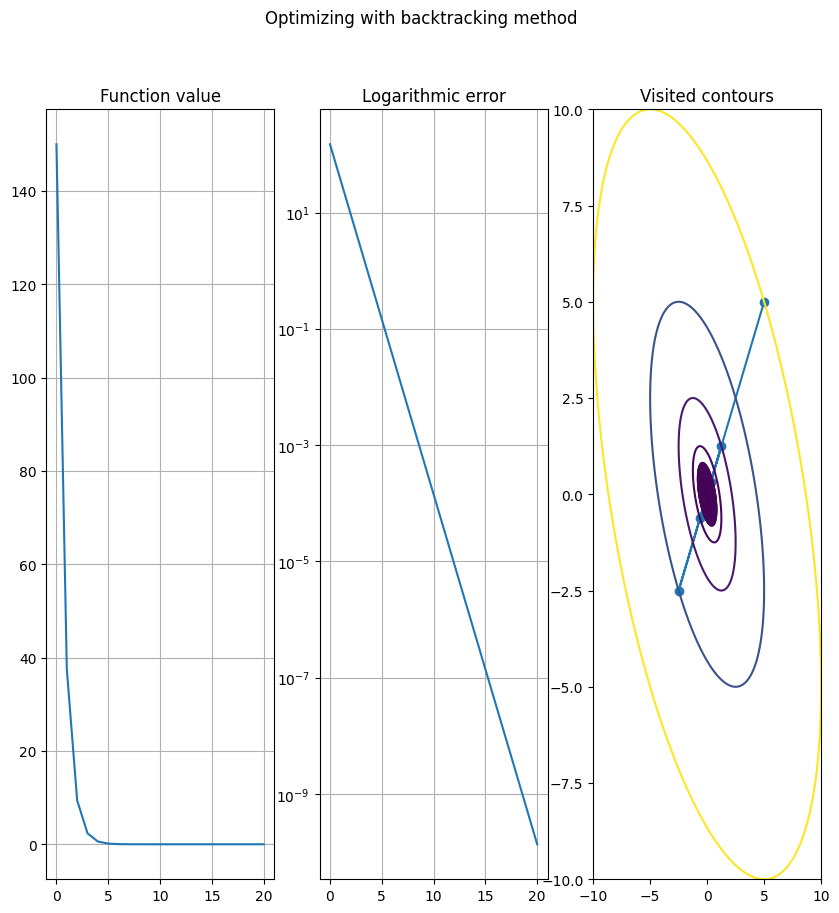

In [17]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.3], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=2, b=2, c=2, d=0, e=0)

## Равномерное растяжение координат

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[ 5.00000e+00  5.00000e+00]
 [-1.00000e+00 -1.00000e+00]
 [ 2.00000e-01  2.00000e-01]
 [-4.00000e-02 -4.00000e-02]
 [ 8.00000e-03  8.00000e-03]
 [-1.60000e-03 -1.60000e-03]
 [ 3.20000e-04  3.20000e-04]
 [-6.40000e-05 -6.40000e-05]
 [ 1.28000e-05  1.28000e-05]
 [-2.56000e-06 -2.56000e-06]
 [ 5.12000e-07  5.12000e-07]
 [-1.02400e-07 -1.02400e-07]
 [ 2.04800e-08  2.04800e-08]
 [-4.09600e-09 -4.09600e-09]
 [ 8.19200e-10  8.19200e-10]
 [-1.63840e-10 -1.63840e-10]
 [ 3.27680e-11  3.27680e-11]
 [-6.55360e-12 -6.55360e-12]
 [ 1.31072e-12  1.31072e-12]
 [-2.62144e-13 -2.62144e-13]
 [ 5.24288e-14  5.24288e-14]]
Best value found: x* = [5.24288e-14 5.24288e-14] with f(x*) = 3.2985348833280665e-26
Optimizing with fixed step = 0.3
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [-1.30000000e+01 -1.30000000e+01]
 [ 3.38000000e+01  3.38000000e+01]
 [-8.78800000e+01 -8.78800000e+01]
 [ 2.28488000e+02  2.28488000e+02]
 [-5.

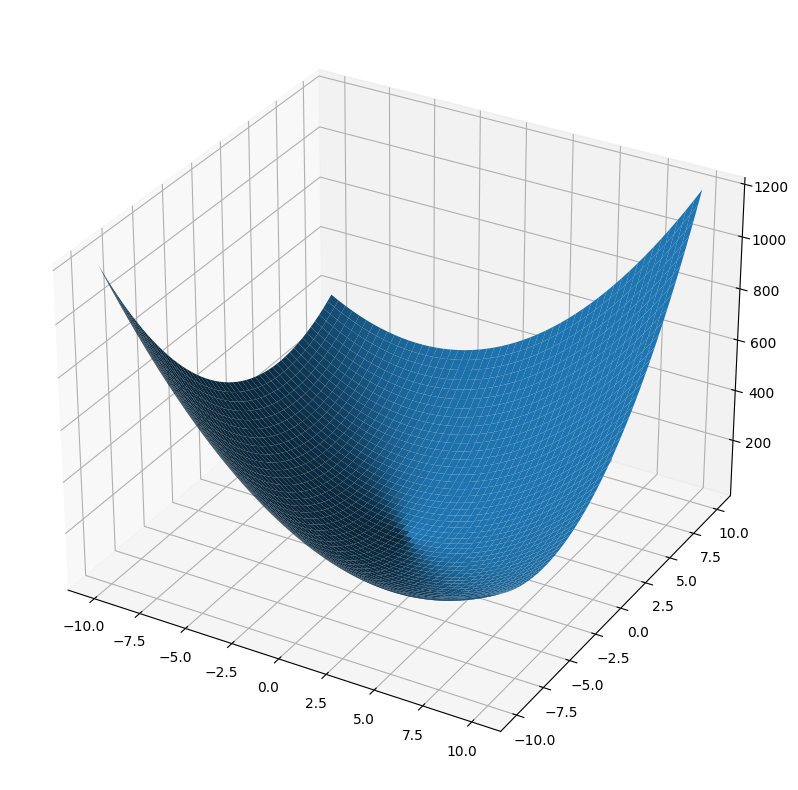

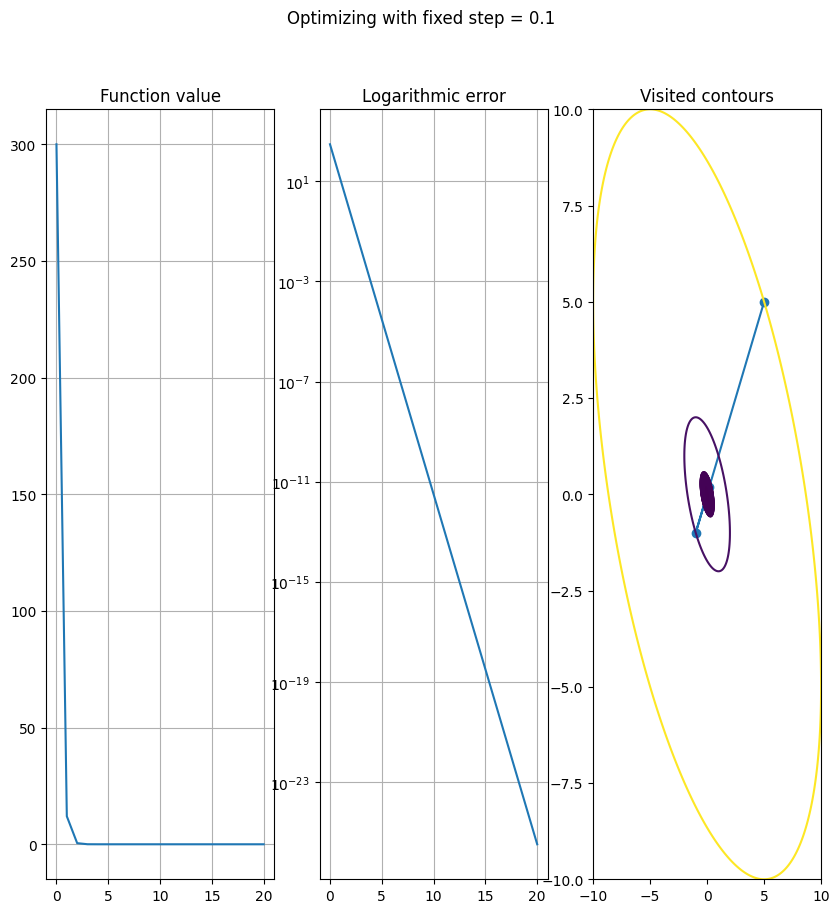

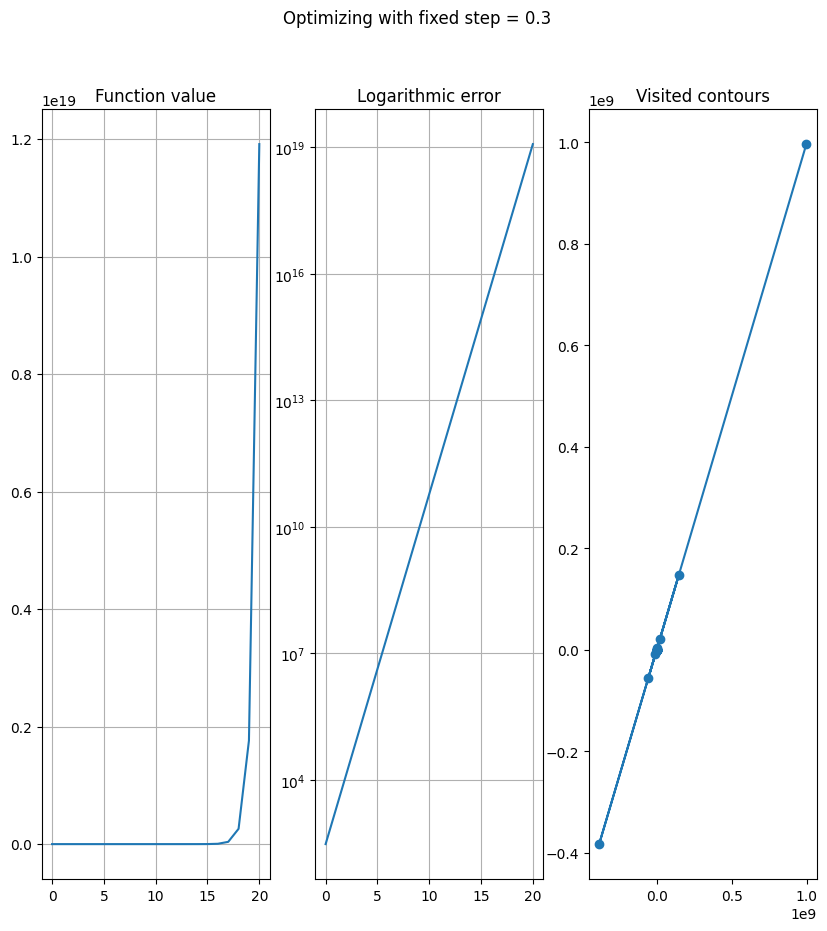

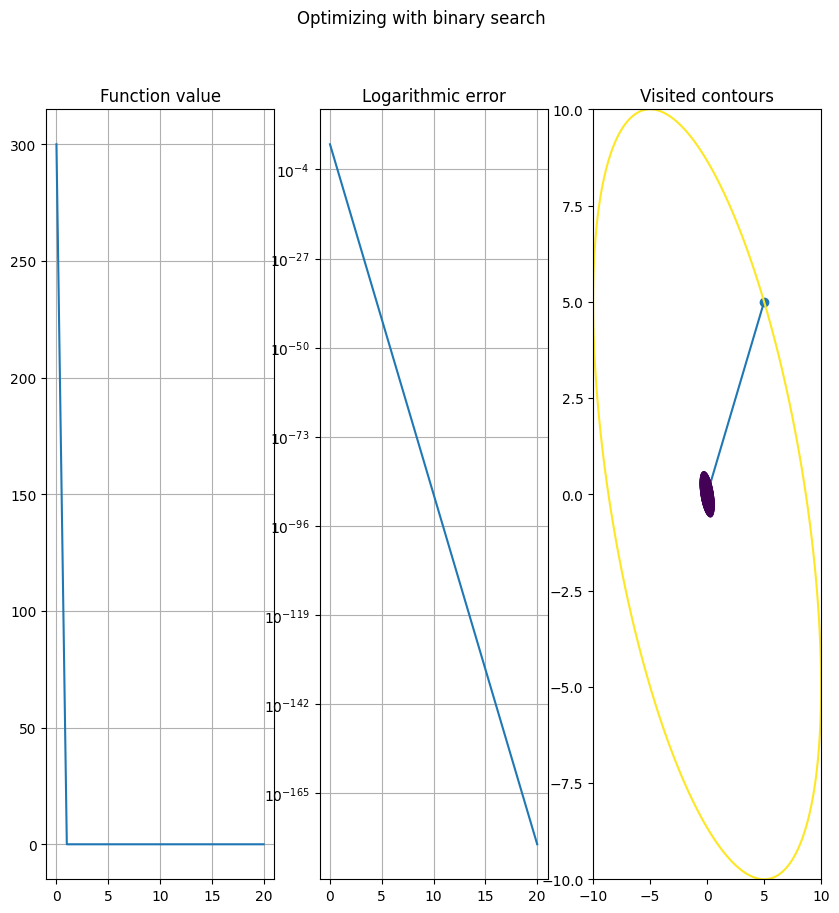

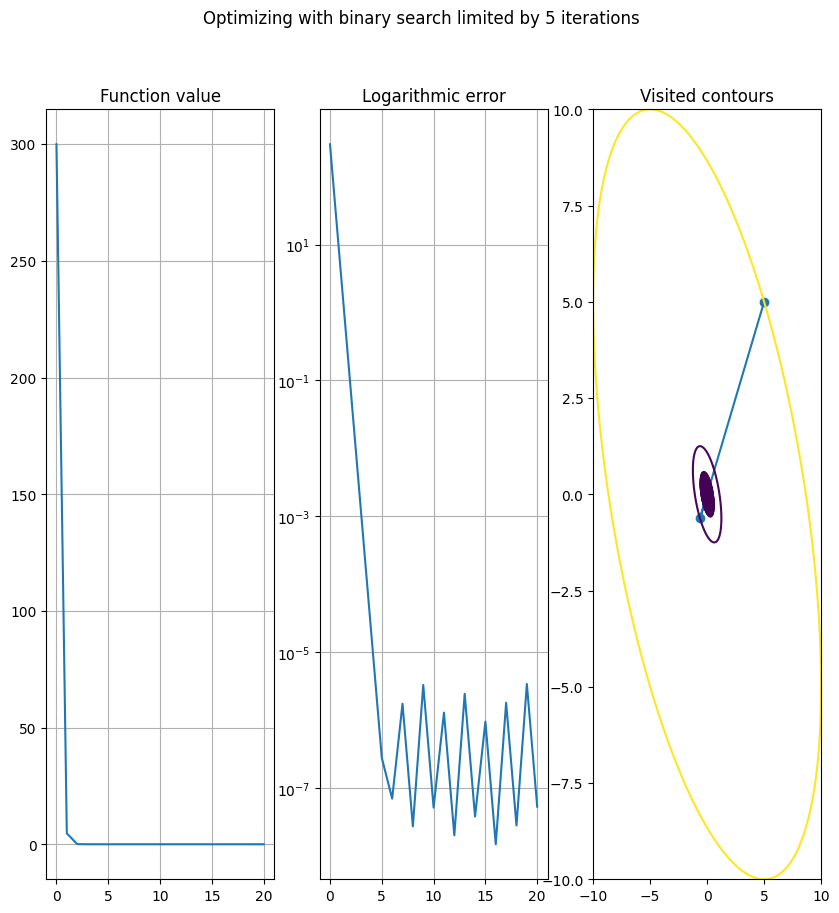

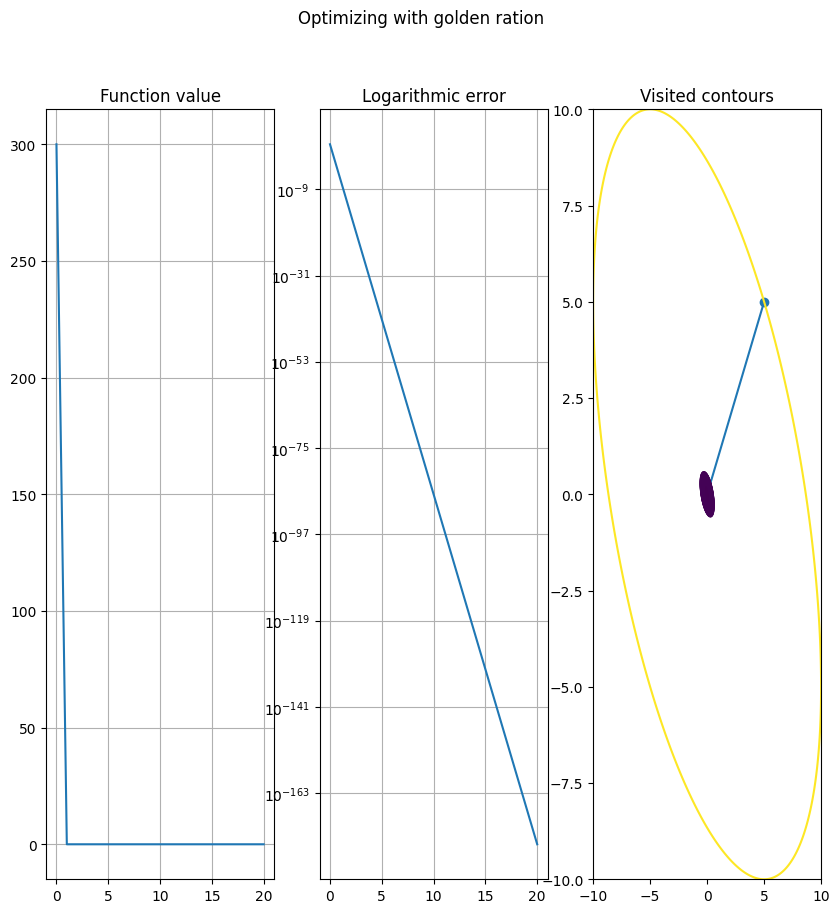

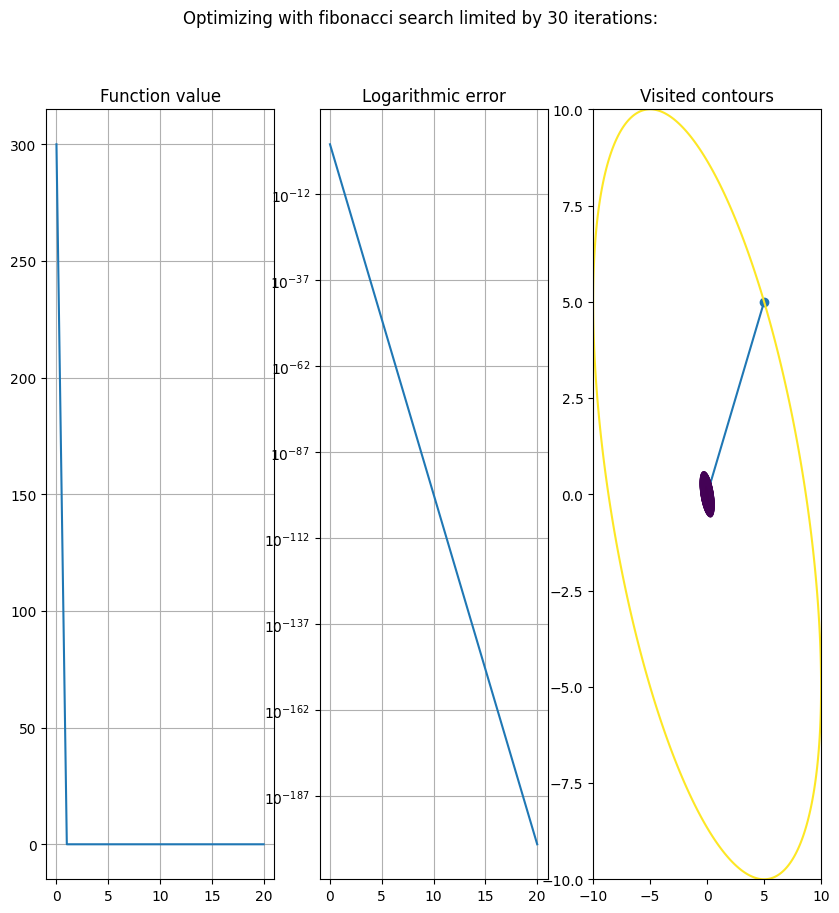

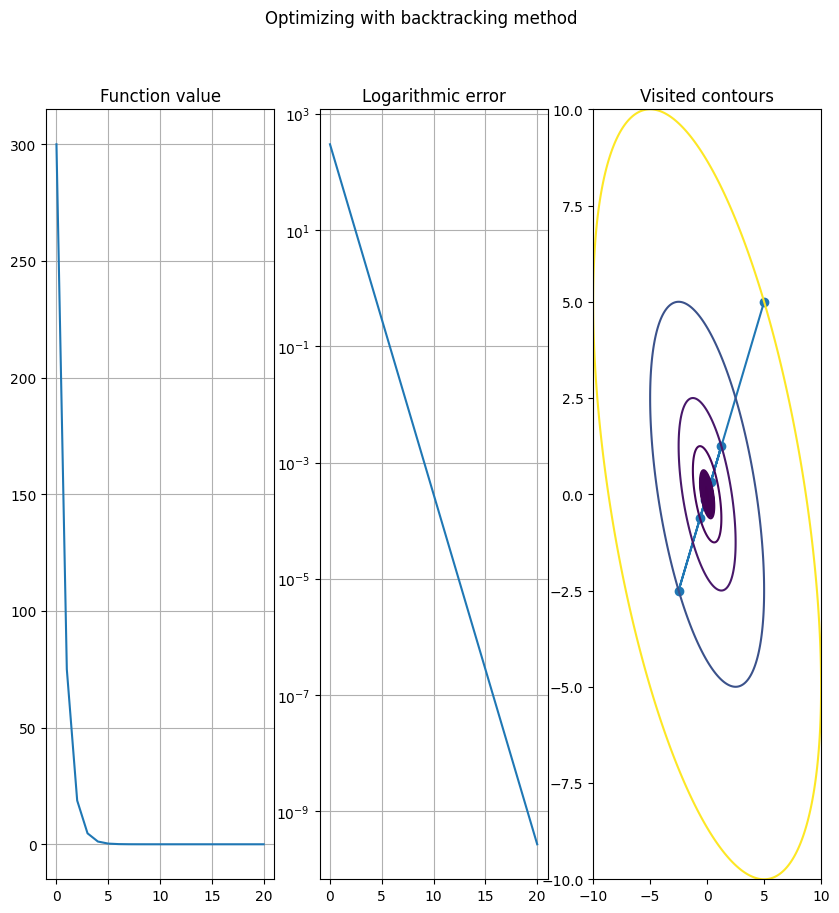

In [18]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.3], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=4, b=4, c=4, d=0, e=0)

## Неравномерное растяжение координат

Function plot:
Optimizing with fixed step = 0.1
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [-5.00000000e+00  1.00000000e+00]
 [ 2.60000000e+00  2.60000000e+00]
 [-2.60000000e+00  5.20000000e-01]
 [ 1.35200000e+00  1.35200000e+00]
 [-1.35200000e+00  2.70400000e-01]
 [ 7.03040000e-01  7.03040000e-01]
 [-7.03040000e-01  1.40608000e-01]
 [ 3.65580800e-01  3.65580800e-01]
 [-3.65580800e-01  7.31161600e-02]
 [ 1.90102016e-01  1.90102016e-01]
 [-1.90102016e-01  3.80204032e-02]
 [ 9.88530483e-02  9.88530483e-02]
 [-9.88530483e-02  1.97706097e-02]
 [ 5.14035851e-02  5.14035851e-02]
 [-5.14035851e-02  1.02807170e-02]
 [ 2.67298643e-02  2.67298643e-02]
 [-2.67298643e-02  5.34597285e-03]
 [ 1.38995294e-02  1.38995294e-02]
 [-1.38995294e-02  2.77990588e-03]
 [ 7.22775530e-03  7.22775530e-03]]
Best value found: x* = [0.00722776 0.00722776] with f(x*) = 0.0007313662529580116
Optimizing with fixed step = 0.3
Optimizer trajectory:
[[ 5.00000000e+00  5.00000000e+00]
 [-2.50000000e+01 -7.0

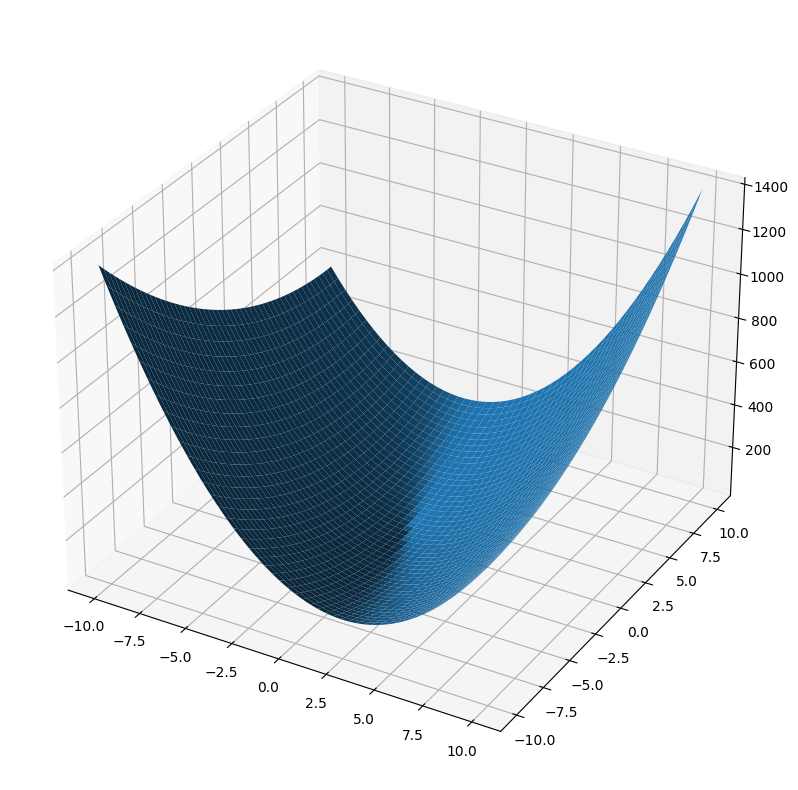

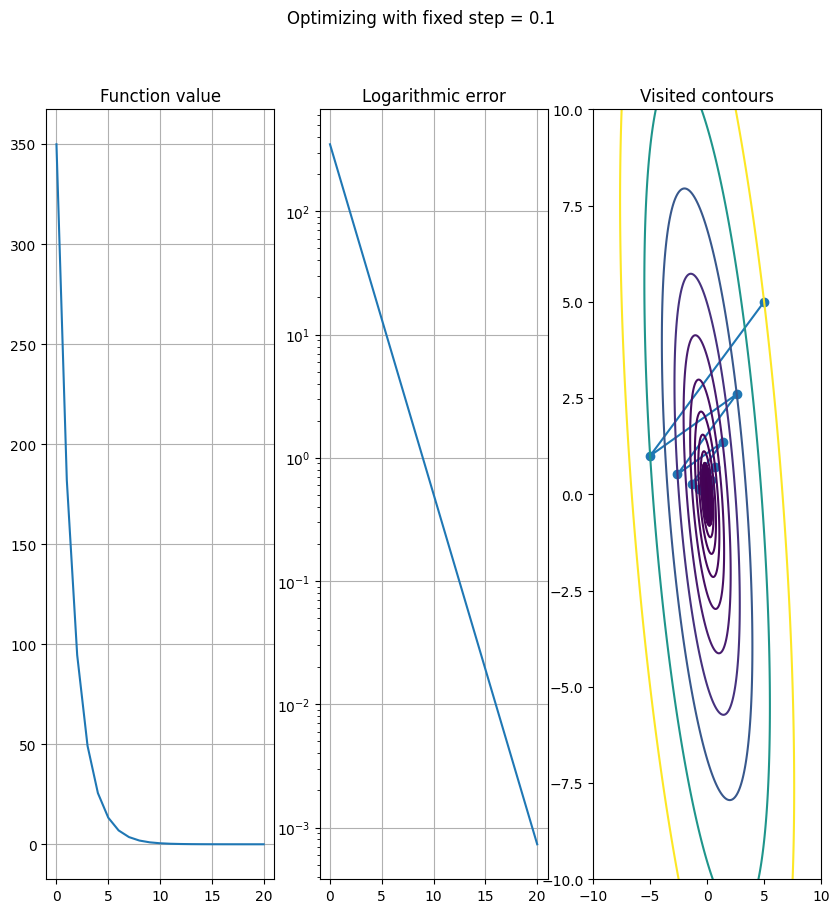

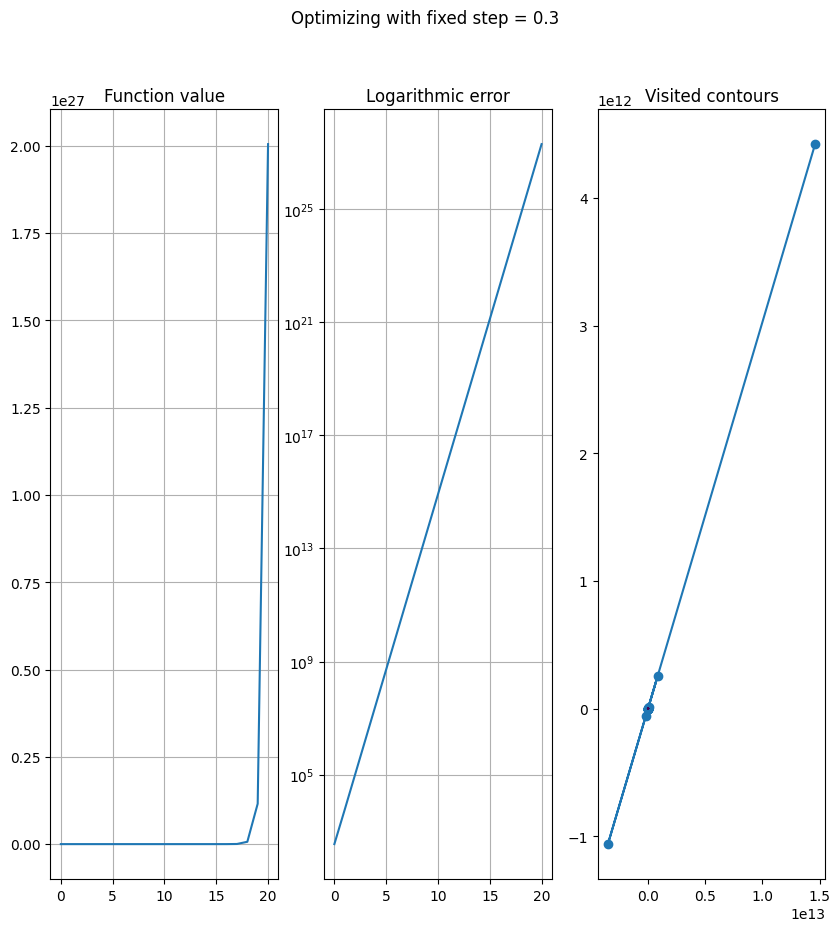

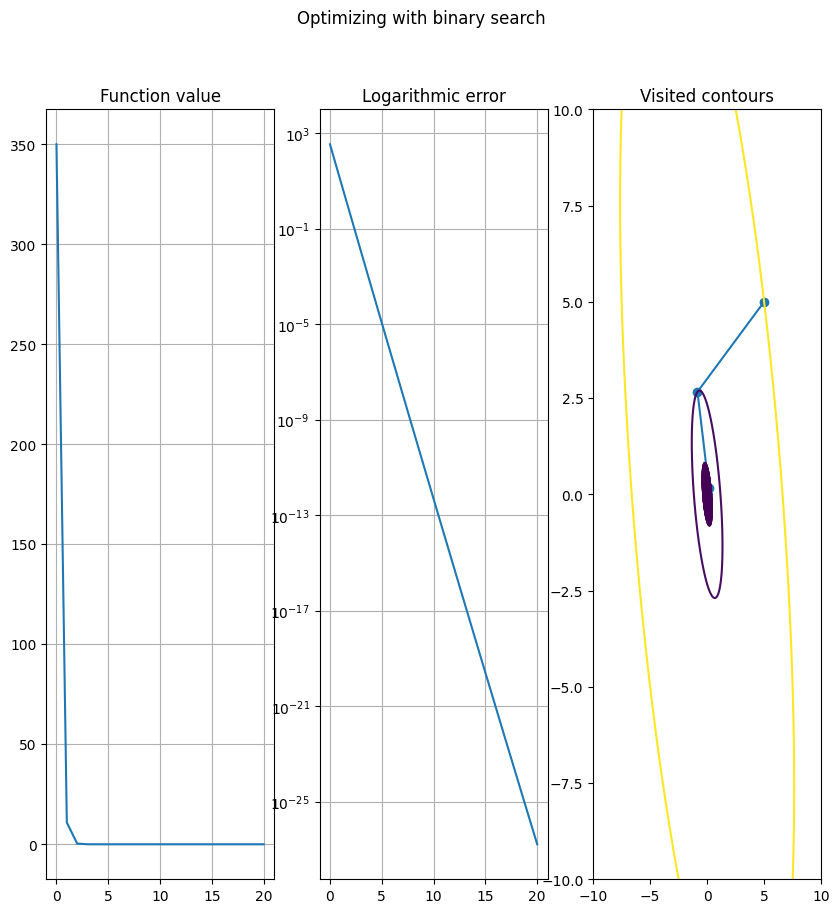

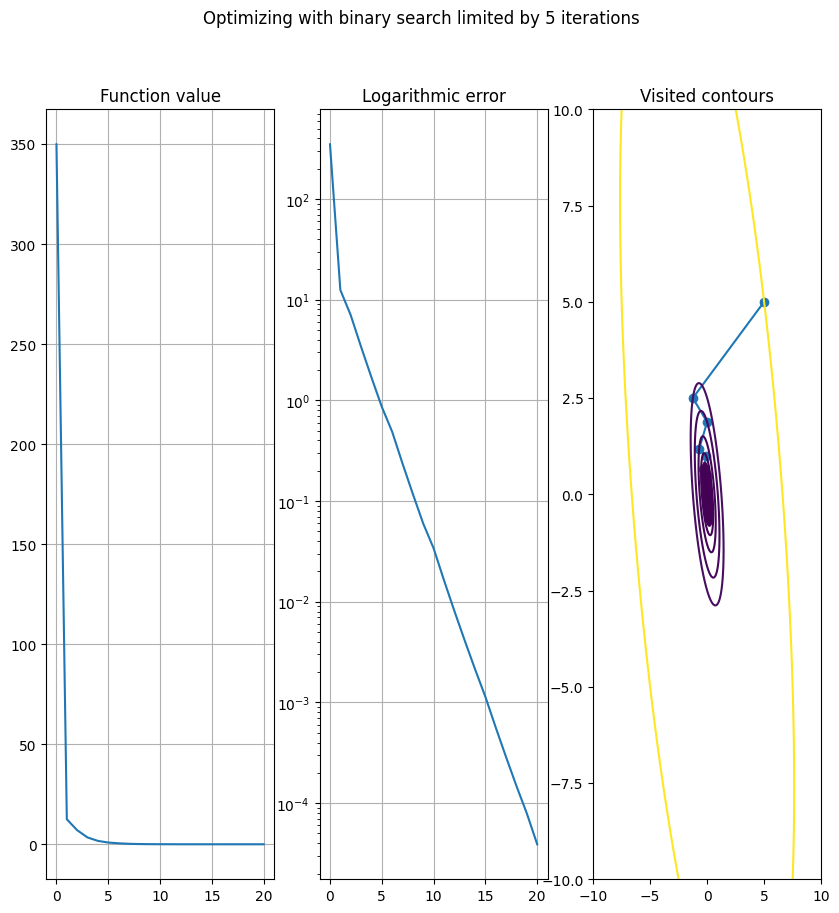

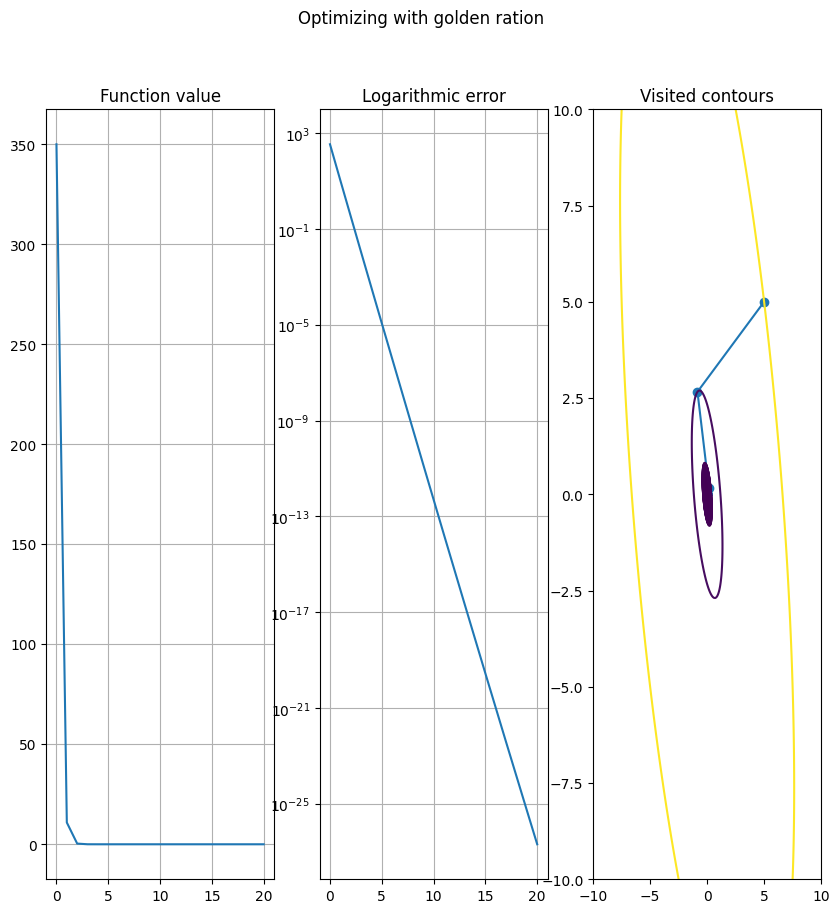

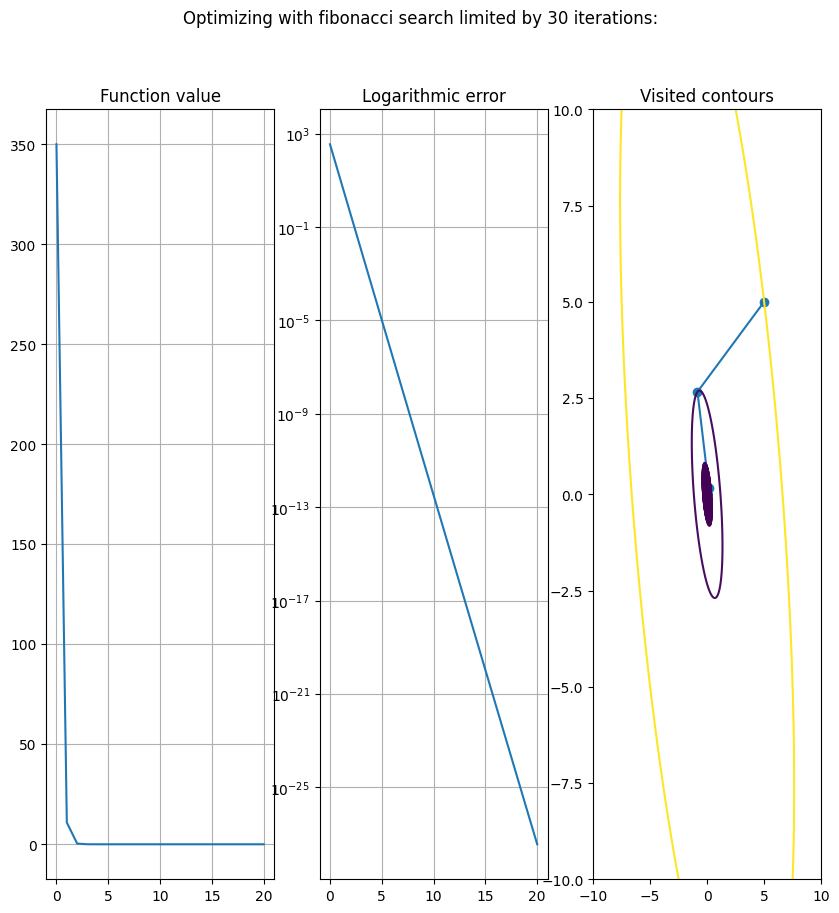

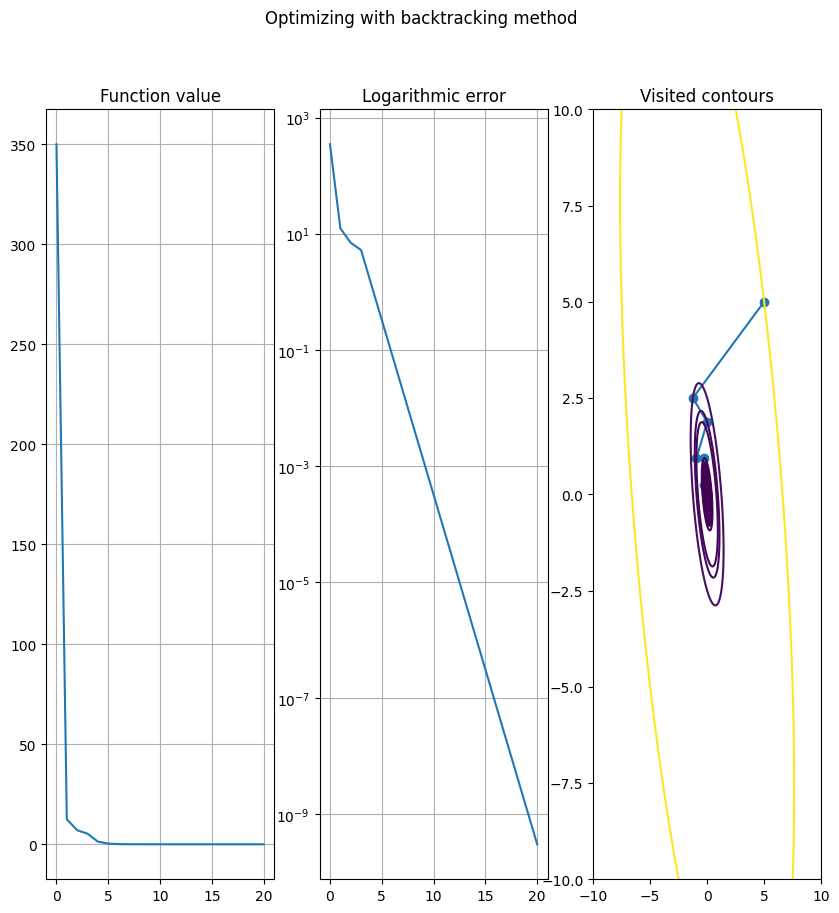

In [19]:
analyze_quadratic(roi=SearchRegion2d((-10, 10), (-10, 10)), fixed_steps=[0.1, 0.3], x0=np.array([5, 5]), bin_iters=5, fib_iters=30, a=8, b=4, c=2, d=0, e=0)